In [1]:
# Mai Xuan Bach
# 11200489
# EDA: application_{train|test}.csv

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
#pd.set_option("display.max_colwidth", None)

In [13]:
pd.set_option('display.max_columns', None)  

In [67]:
pd.set_option('display.max_rows', None)

In [19]:
application_train = pd.read_csv("./home-credit-default-risk/application_train.csv")
application_train.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2            -2531         26.0           1               1                1   
3            -2437          NaN           1               1                0   
4            -3458          NaN           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                        

In [27]:
application_train.shape

(307511, 122)

In [20]:
application_train.head(30)

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0       100002       1         Cash loans           M            N   
1       100003       0         Cash loans           F            N   
2       100004       0    Revolving loans           M            Y   
3       100006       0         Cash loans           F            N   
4       100007       0         Cash loans           M            N   
5       100008       0         Cash loans           M            N   
6       100009       0         Cash loans           F            Y   
7       100010       0         Cash loans           M            Y   
8       100011       0         Cash loans           F            N   
9       100012       0    Revolving loans           M            N   
10      100014       0         Cash loans           F            N   
11      100015       0         Cash loans           F            N   
12      100016       0         Cash loans           F            N   
13      100017       0         Cash loans           M            Y   
14      100018       0         Cash loans           F            N   
15      100019       0         Cash loans           M            Y   
16      100020       0         Cash loans           M            N   
17      100021       0    Revolving loans           F            N   
18      100022       0    Revolving loans           F            N   
19      100023       0         Cash loans           F            N   
20      100024       0    Revolving loans           M            Y   
21      100025       0         Cash loans           F            Y   
22      100026       0         Cash loans           F            N   
23      100027       0         Cash loans           F            N   
24      100029       0         Cash loans           M            Y   
25      100030       0         Cash loans           F            N   
26      100031       1         Cash loans           F            N   
27      100032       0         Cash loans           M            N   
28      100033       0         Cash loans           M            Y   
29      100034       0    Revolving loans           M            N   

   FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0                Y             0        202500.000    406597.5      24700.5   
1                N             0        270000.000   1293502.5      35698.5   
2                Y             0         67500.000    135000.0       6750.0   
3                Y             0        135000.000    312682.5      29686.5   
4                Y             0        121500.000    513000.0      21865.5   
5                Y             0         99000.000    490495.5      27517.5   
6                Y             1        171000.000   1560726.0      41301.0   
7                Y             0        360000.000   1530000.0      42075.0   
8                Y             0        112500.000   1019610.0      33826.5   
9                Y             0        135000.000    405000.0      20250.0   
10               Y             1        112500.000    652500.0      21177.0   
11               Y             0         38419.155    148365.0      10678.5   
12               Y             0         67500.000     80865.0       5881.5   
13               N             1        225000.000    918468.0      28966.5   
14               Y             0        189000.000    773680.5      32778.0   
15               Y             0        157500.000    299772.0      20160.0   
16               N             0        108000.000    509602.5      26149.5   
17               Y             1         81000.000    270000.0      13500.0   
18               Y             0        112500.000    157500.0       7875.0   
19               Y             1         90000.000    544491.0      17563.5   
20               Y             0        135000.000    427500.0      21375.0   
21               Y             1        202500.000   1132573.5      37561.5   
22              

### Number of non-null

In [21]:
application_train.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Non-Null Count   Dtype  
---   ------                        --------------   -----  
 0    SK_ID_CURR                    307511 non-null  int64  
 1    TARGET                        307511 non-null  int64  
 2    NAME_CONTRACT_TYPE            307511 non-null  object 
 3    CODE_GENDER                   307511 non-null  object 
 4    FLAG_OWN_CAR                  307511 non-null  object 
 5    FLAG_OWN_REALTY               307511 non-null  object 
 6    CNT_CHILDREN                  307511 non-null  int64  
 7    AMT_INCOME_TOTAL              307511 non-null  float64
 8    AMT_CREDIT                    307511 non-null  float64
 9    AMT_ANNUITY                   307499 non-null  float64
 10   AMT_GOODS_PRICE               307233 non-null  float64
 11   NAME_TYPE_SUITE               306219 non-null  object 
 12   NAME_INCOME_TYPE            

### Number of unique values of each column

In [26]:
# Number of unique values of each column:
for col in application_train:
    print(col, application_train[col].nunique())

SK_ID_CURR 307511
TARGET 2
NAME_CONTRACT_TYPE 2
CODE_GENDER 3
FLAG_OWN_CAR 2
FLAG_OWN_REALTY 2
CNT_CHILDREN 15
AMT_INCOME_TOTAL 2548
AMT_CREDIT 5603
AMT_ANNUITY 13672
AMT_GOODS_PRICE 1002
NAME_TYPE_SUITE 7
NAME_INCOME_TYPE 8
NAME_EDUCATION_TYPE 5
NAME_FAMILY_STATUS 6
NAME_HOUSING_TYPE 6
REGION_POPULATION_RELATIVE 81
DAYS_BIRTH 17460
DAYS_EMPLOYED 12574
DAYS_REGISTRATION 15688
DAYS_ID_PUBLISH 6168
OWN_CAR_AGE 62
FLAG_MOBIL 2
FLAG_EMP_PHONE 2
FLAG_WORK_PHONE 2
FLAG_CONT_MOBILE 2
FLAG_PHONE 2
FLAG_EMAIL 2
OCCUPATION_TYPE 18
CNT_FAM_MEMBERS 17
REGION_RATING_CLIENT 3
REGION_RATING_CLIENT_W_CITY 3
WEEKDAY_APPR_PROCESS_START 7
HOUR_APPR_PROCESS_START 24
REG_REGION_NOT_LIVE_REGION 2
REG_REGION_NOT_WORK_REGION 2
LIVE_REGION_NOT_WORK_REGION 2
REG_CITY_NOT_LIVE_CITY 2
REG_CITY_NOT_WORK_CITY 2
LIVE_CITY_NOT_WORK_CITY 2
ORGANIZATION_TYPE 58
EXT_SOURCE_1 114584
EXT_SOURCE_2 119831
EXT_SOURCE_3 814
APARTMENTS_AVG 2339
BASEMENTAREA_AVG 3780
YEARS_BEGINEXPLUATATION_AVG 285
YEARS_BUILD_AVG 149
COMMONARE

In [28]:
application_train.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64

### Number of Null values of each column

In [30]:
# Number of Null values of each column:
for col in application_train:
    print(col, application_train[col].isnull().sum())

SK_ID_CURR 0
TARGET 0
NAME_CONTRACT_TYPE 0
CODE_GENDER 0
FLAG_OWN_CAR 0
FLAG_OWN_REALTY 0
CNT_CHILDREN 0
AMT_INCOME_TOTAL 0
AMT_CREDIT 0
AMT_ANNUITY 12
AMT_GOODS_PRICE 278
NAME_TYPE_SUITE 1292
NAME_INCOME_TYPE 0
NAME_EDUCATION_TYPE 0
NAME_FAMILY_STATUS 0
NAME_HOUSING_TYPE 0
REGION_POPULATION_RELATIVE 0
DAYS_BIRTH 0
DAYS_EMPLOYED 0
DAYS_REGISTRATION 0
DAYS_ID_PUBLISH 0
OWN_CAR_AGE 202929
FLAG_MOBIL 0
FLAG_EMP_PHONE 0
FLAG_WORK_PHONE 0
FLAG_CONT_MOBILE 0
FLAG_PHONE 0
FLAG_EMAIL 0
OCCUPATION_TYPE 96391
CNT_FAM_MEMBERS 2
REGION_RATING_CLIENT 0
REGION_RATING_CLIENT_W_CITY 0
WEEKDAY_APPR_PROCESS_START 0
HOUR_APPR_PROCESS_START 0
REG_REGION_NOT_LIVE_REGION 0
REG_REGION_NOT_WORK_REGION 0
LIVE_REGION_NOT_WORK_REGION 0
REG_CITY_NOT_LIVE_CITY 0
REG_CITY_NOT_WORK_CITY 0
LIVE_CITY_NOT_WORK_CITY 0
ORGANIZATION_TYPE 0
EXT_SOURCE_1 173378
EXT_SOURCE_2 660
EXT_SOURCE_3 60965
APARTMENTS_AVG 156061
BASEMENTAREA_AVG 179943
YEARS_BEGINEXPLUATATION_AVG 150007
YEARS_BUILD_AVG 204488
COMMONAREA_AVG 214865
ELE

In [113]:
# Percentage of Null values of each column:
for col in application_train:
    print(col, application_train[col].isnull().sum()  / len(application_train) * 100)

SK_ID_CURR 0.0
TARGET 0.0
NAME_CONTRACT_TYPE 0.0
CODE_GENDER 0.0
FLAG_OWN_CAR 0.0
FLAG_OWN_REALTY 0.0
CNT_CHILDREN 0.0
AMT_INCOME_TOTAL 0.0
AMT_CREDIT 0.0
AMT_ANNUITY 0.003902299429939092
AMT_GOODS_PRICE 0.09040327012692229
NAME_TYPE_SUITE 0.42014757195677555
NAME_INCOME_TYPE 0.0
NAME_EDUCATION_TYPE 0.0
NAME_FAMILY_STATUS 0.0
NAME_HOUSING_TYPE 0.0
REGION_POPULATION_RELATIVE 0.0
DAYS_BIRTH 0.0
DAYS_EMPLOYED 0.0
DAYS_REGISTRATION 0.0
DAYS_ID_PUBLISH 0.0
OWN_CAR_AGE 65.9908100848425
FLAG_MOBIL 0.0
FLAG_EMP_PHONE 0.0
FLAG_WORK_PHONE 0.0
FLAG_CONT_MOBILE 0.0
FLAG_PHONE 0.0
FLAG_EMAIL 0.0
OCCUPATION_TYPE 31.345545362604916
CNT_FAM_MEMBERS 0.0006503832383231819
REGION_RATING_CLIENT 0.0
REGION_RATING_CLIENT_W_CITY 0.0
WEEKDAY_APPR_PROCESS_START 0.0
HOUR_APPR_PROCESS_START 0.0
REG_REGION_NOT_LIVE_REGION 0.0
REG_REGION_NOT_WORK_REGION 0.0
LIVE_REGION_NOT_WORK_REGION 0.0
REG_CITY_NOT_LIVE_CITY 0.0
REG_CITY_NOT_WORK_CITY 0.0
LIVE_CITY_NOT_WORK_CITY 0.0
ORGANIZATION_TYPE 0.0
EXT_SOURCE_1 56.3810725

### Describe the statistics of all numeric columns

In [31]:
application_train.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  \
count               307511.000000  307511.000000  307511.000000   
mean                     0.020868  -16036.995067   63815.045904   
std                      0.013831    4363.988632  141275.766519   
min                      0.000290  -25229.000000  -17912.000000   
25%                      0.010006  -19682.000000   -2760.000000   
50%                      0.018850  -15750.000000   -1213.000000   
75%                      0.028663  -12413.000000    -289.000000   
max                      0.072508   -7489.000000  365243.000000   

       DAYS_REGISTRATION  DAYS_ID_PUBLISH    OWN_CAR_AGE     FLAG_MOBIL  \
count      307511.000000    307511.000000  104582.000000  307511.000000   
mean        -4986.120328     -2994.202373      12.061091       0.999997   
std          3522.886321      1509.450419      11.944812       0.001803   
min        -24672.000000     -7197.000000       0.000000       0.000000   
25%         -7479.500000     -4299.000000       5.000000       1.000000   
50%         -4504.000000     -3254.000000       9.000000       1.000000   
75%         -2010.000000     -1720.000000      15.000000       1.000000   
max             0.000000         0.000000      91.000000       1.000000   

       FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE     FLAG_PHONE  \
count   307511.000000    307511.000000     307511.000000  307511.000000   
mean         0.819889         0.199368          0.998133       0.281066   
std          0.384280         0.399526          0.043164       0.449521   
min          0.000000         0.000000          0.000000       0.000000   
25%          1.000000         0.000000          1.000000       0.000000   
50%          1.000000         0.000000          1.000000       0.000000   
75%          1.000000         0.000000          1.000000       1.000000   
max          1.000000         1.000000          1.000000       1.000000   

          FLAG_EMAIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
count  307511.000000    307509.000000         307511.000000   
mean        0.056720         2.152665              2.052463   
std         0.231307         0.910682              0.509034   
min         0.000000         1.000000              1.000000   
25%         0.000000         2.000000              2.000000   
50%         0.000000         2.000000              2.000000   
75%         0.000000         3.000000              2.000000   
max         1.000000        20.000000              3.000000   

       REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  \
count                307511.000000            307511.000000   
mean                      2.031521                12.063419   
std                       0.502737                 3.265832   
min                       1.000000                 0.000000   
25%                       

### Describe the statistics of all object/category columns

In [33]:
application_train.describe(include=["object", "category"])

NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
count              307511      307511       307511          307511   
unique                  2           3            2               2   
top            Cash loans           F            N               Y   
freq               278232      202448       202924          213312   

       NAME_TYPE_SUITE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
count           306219           307511                         307511   
unique               7                8                              5   
top      Unaccompanied          Working  Secondary / secondary special   
freq            248526           158774                         218391   

       NAME_FAMILY_STATUS  NAME_HOUSING_TYPE OCCUPATION_TYPE  \
count              307511             307511          211120   
unique                  6                  6              18   
top               Married  House / apartment        Laborers   
freq               196432             272868           55186   

       WEEKDAY_APPR_PROCESS_START       ORGANIZATION_TYPE FONDKAPREMONT_MODE  \
count                      307511                  307511              97216   
unique                          7                      58                  4   
top                       TUESDAY  Business Entity Type 3   reg oper account   
freq                        53901                   67992              73830   

        HOUSETYPE_MODE WALLSMATERIAL_MODE EMERGENCYSTATE_MODE  
count           153214             151170              161756  
unique               3                  7                   2  
top     block of flats              Panel                  No  
freq            150503              66040              159428

### List out the unique values of each column

In [59]:
for each in application_train.columns:
    print(each, "\n" ,application_train[each].unique())

SK_ID_CURR 
 [100002 100003 100004 ... 456253 456254 456255]
TARGET 
 [1 0]
NAME_CONTRACT_TYPE 
 ['Cash loans' 'Revolving loans']
CODE_GENDER 
 ['M' 'F' 'XNA']
FLAG_OWN_CAR 
 ['N' 'Y']
FLAG_OWN_REALTY 
 ['Y' 'N']
CNT_CHILDREN 
 [ 0  1  2  3  4  7  5  6  8  9 11 12 10 19 14]
AMT_INCOME_TOTAL 
 [202500.  270000.   67500.  ...  96768.  546250.5 113062.5]
AMT_CREDIT 
 [ 406597.5 1293502.5  135000.  ...  181989.   743863.5 1391130. ]
AMT_ANNUITY 
 [24700.5 35698.5  6750.  ... 71986.5 58770.  77809.5]
AMT_GOODS_PRICE 
 [ 351000.  1129500.   135000.  ...  453465.   143977.5  743863.5]
NAME_TYPE_SUITE 
 ['Unaccompanied' 'Family' 'Spouse, partner' 'Children' 'Other_A' nan
 'Other_B' 'Group of people']
NAME_INCOME_TYPE 
 ['Working' 'State servant' 'Commercial associate' 'Pensioner' 'Unemployed'
 'Student' 'Businessman' 'Maternity leave']
NAME_EDUCATION_TYPE 
 ['Secondary / secondary special' 'Higher education' 'Incomplete higher'
 'Lower secondary' 'Academic degree']
NAME_FAMILY_STATUS 
 ['Singl

APARTMENTS_MEDI 
 [0.025  0.0968    nan ... 0.9993 0.6527 0.3024]
BASEMENTAREA_MEDI 
 [0.0369 0.0529    nan ... 0.3482 0.274  0.2733]
YEARS_BEGINEXPLUATATION_MEDI 
 [0.9722 0.9851    nan 0.9811 0.9806 0.9985 0.9881 0.9781 0.9786 0.9876
 0.9861 0.9732 0.9831 0.9697 0.9901 0.9801 0.9762 0.996  0.998  0.9846
 0.9886 0.9136 0.9841 0.9856 0.9955 0.9677 0.9891 0.9752 0.9826 0.9727
 0.9578 0.9742 0.9707 0.9975 0.999  0.9816 0.9866 0.9836 0.994  0.9757
 0.9737 0.9791 0.9821 0.9682 0.9945 0.9771 0.9747 0.9776 0.9796 0.9896
 0.9692 0.9518 0.995  0.9995 0.9414 0.993  0.9702 0.9921 0.9916 0.9712
 0.4933 0.9871 0.9672 0.9911 0.9608 0.9906 0.9503 0.9598 0.997  0.9583
 0.9767 0.929  0.9935 0.9617 0.9563 0.9965 0.9925 0.9508 0.9717 0.9687
 0.9667 0.9359 0.9573 0.9588 0.9513 0.9642 0.9553 0.9603 0.9622 0.9637
 0.     0.9568 0.9652 0.9523 0.4953 0.9473 0.9071 0.9593 0.9627 0.9613
 0.9439 0.9434 0.9488 0.4973 0.9459 0.9334 0.9657 0.9632 0.9424 0.9548
 0.9449 0.4913 0.9647 0.9662 0.9468 0.9001 0.9324 0.93

### The frequency, histogram of each column

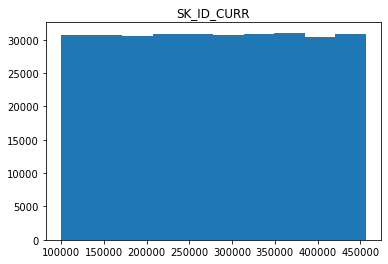

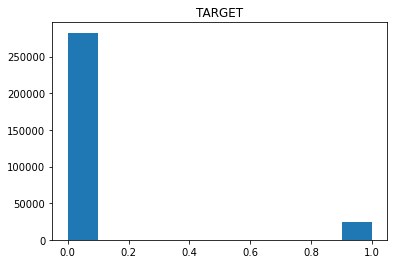

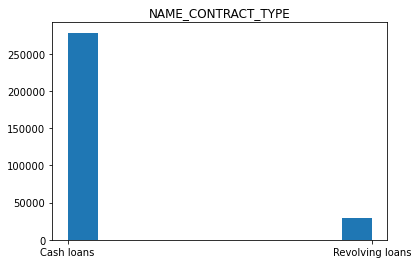

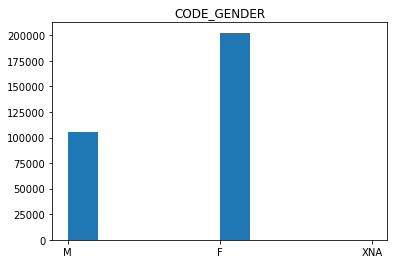

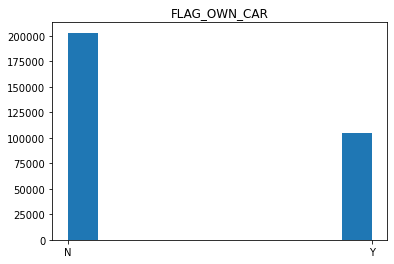

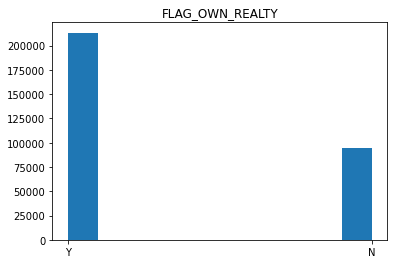

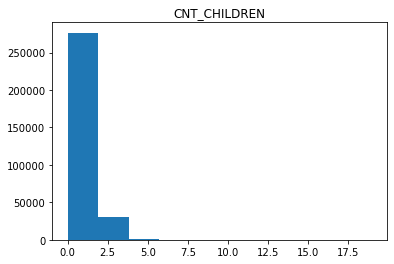

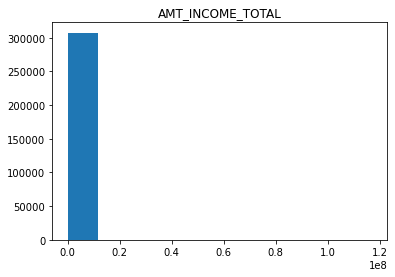

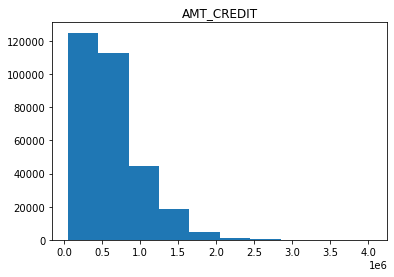

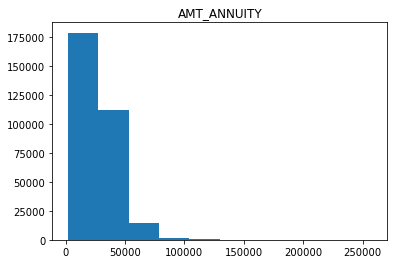

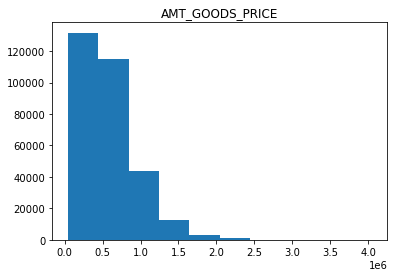

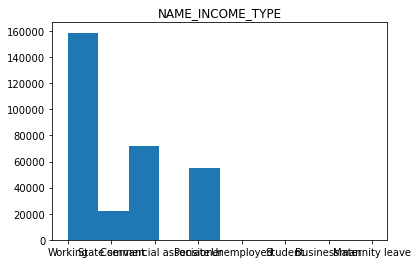

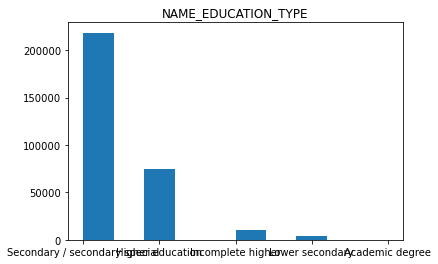

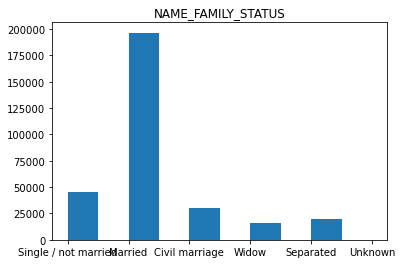

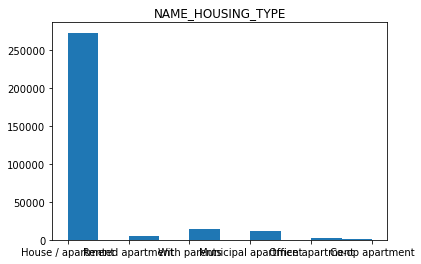

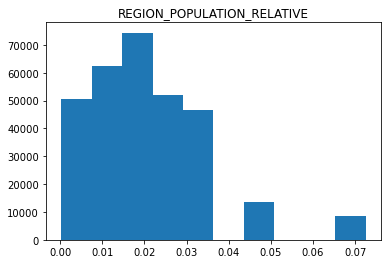

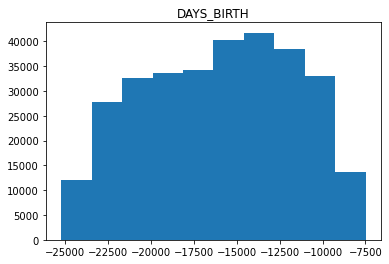

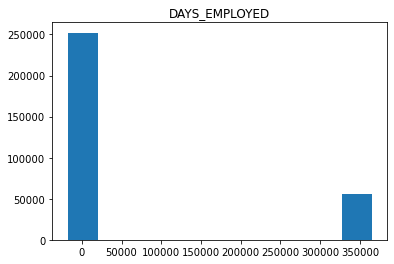

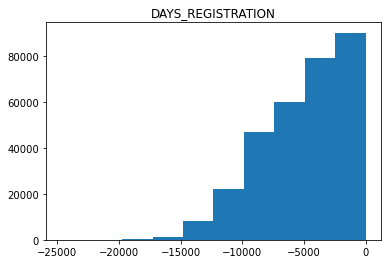

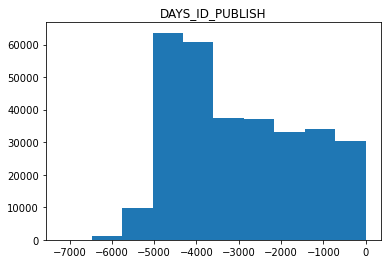

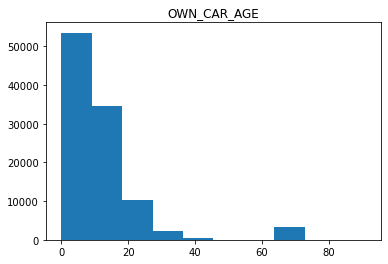

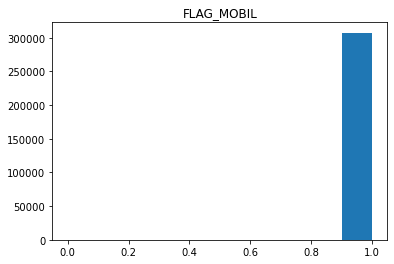

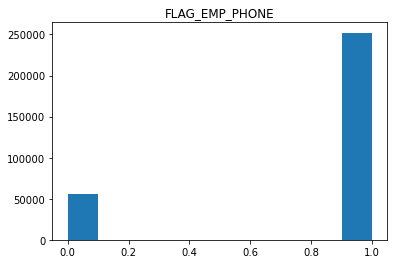

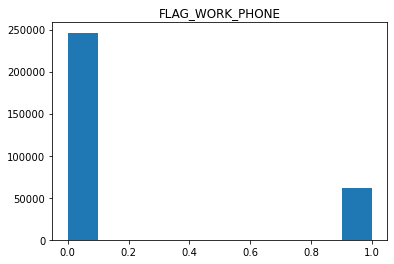

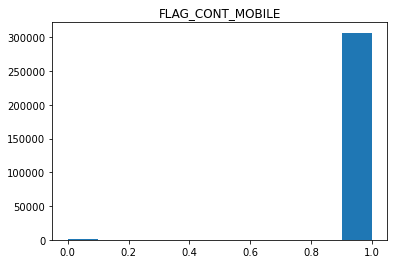

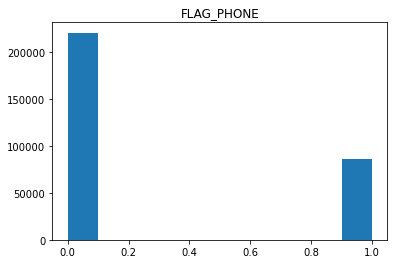

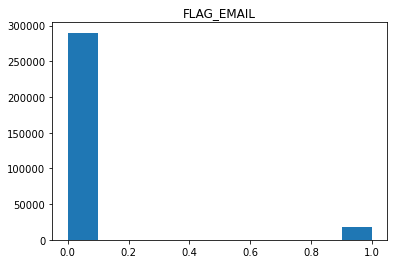

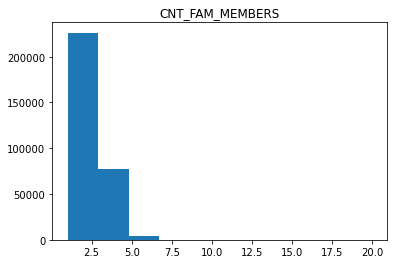

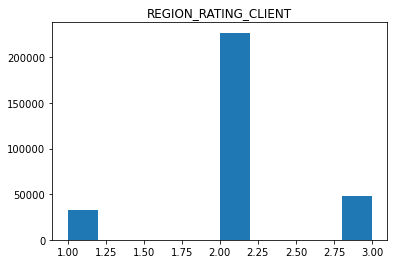

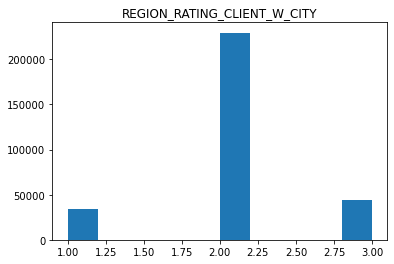

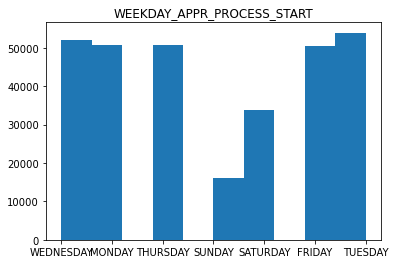

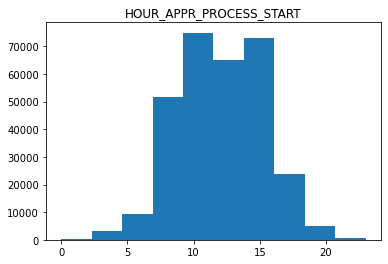

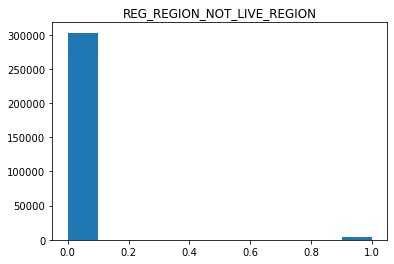

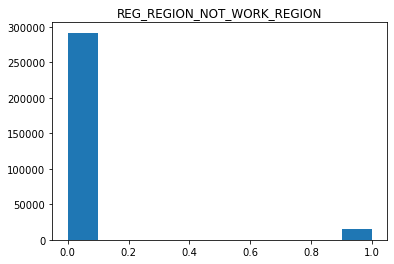

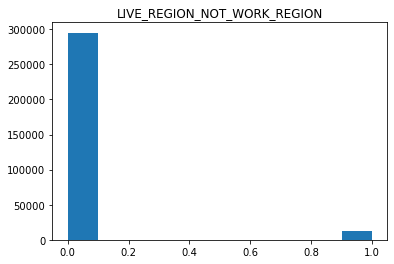

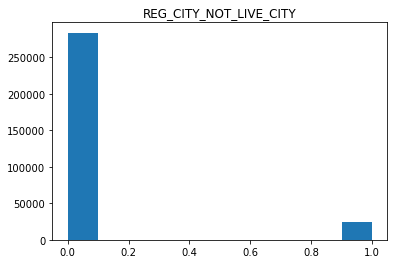

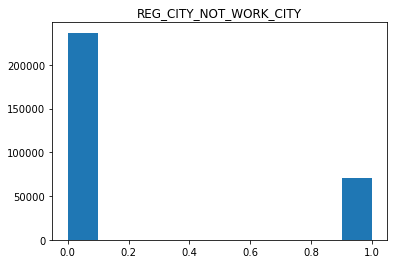

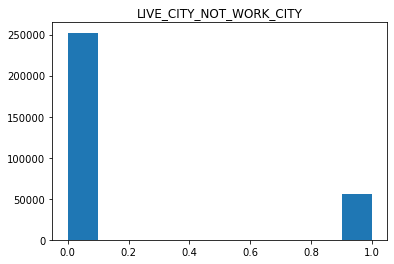

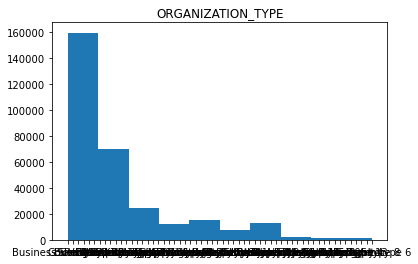

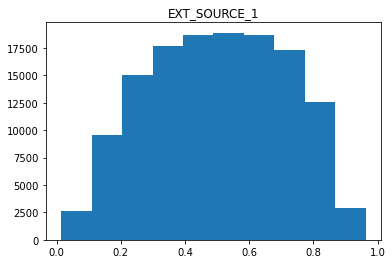

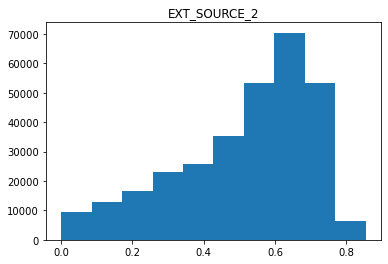

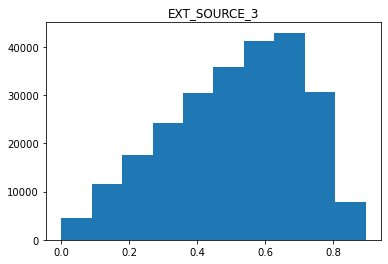

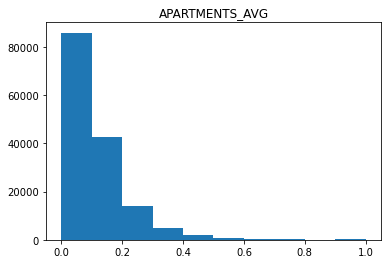

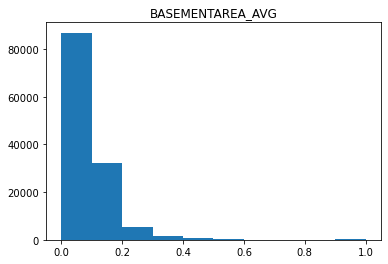

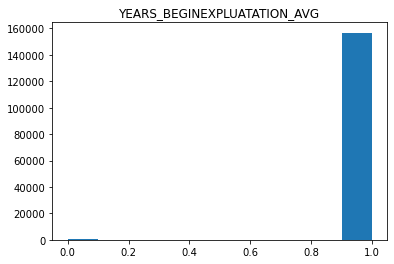

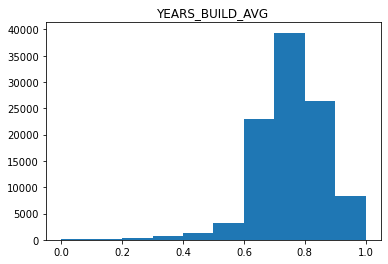

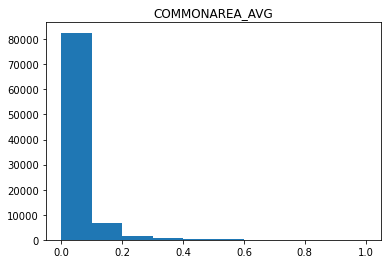

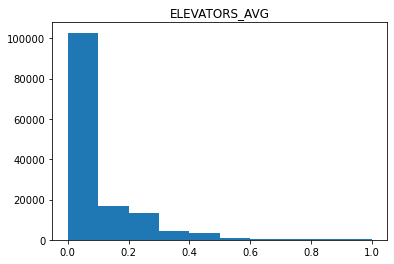

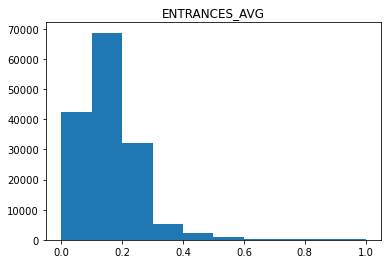

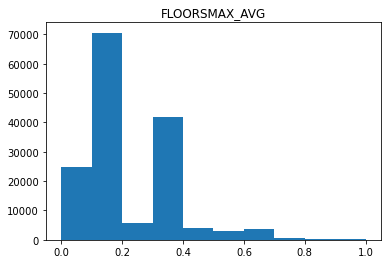

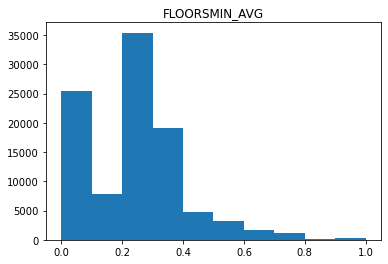

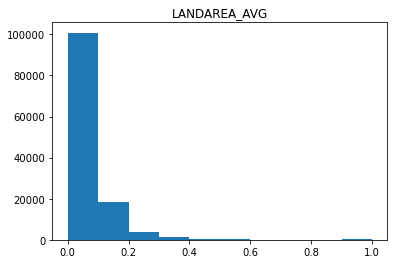

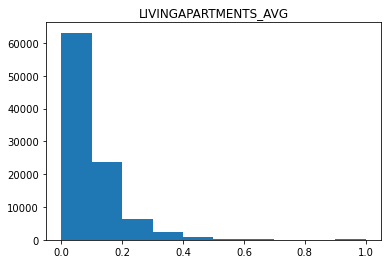

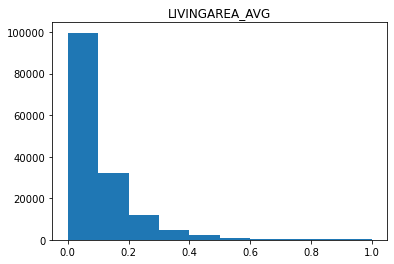

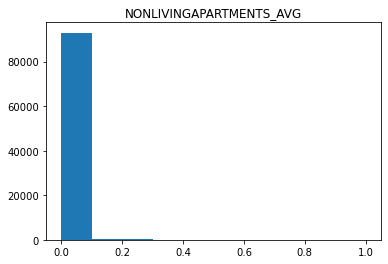

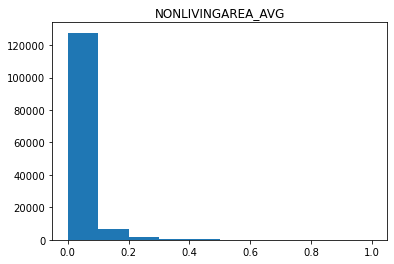

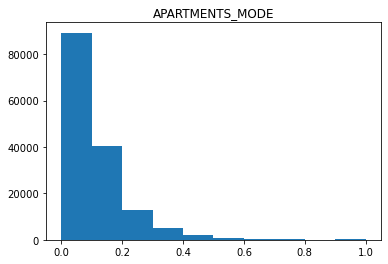

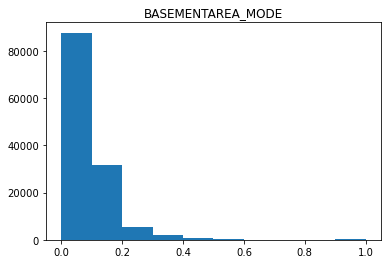

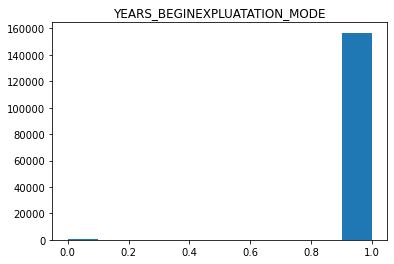

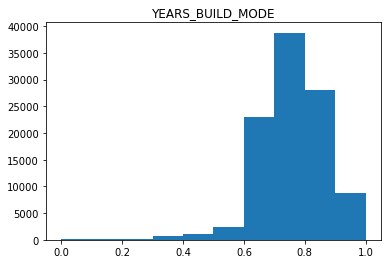

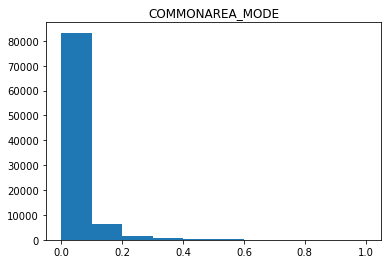

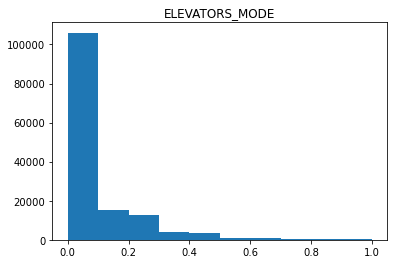

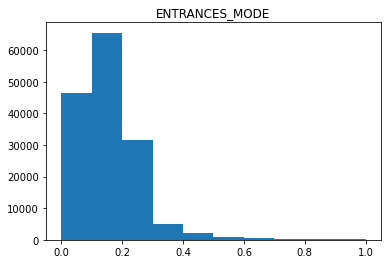

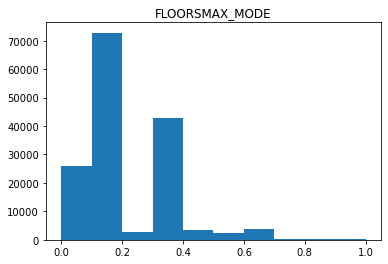

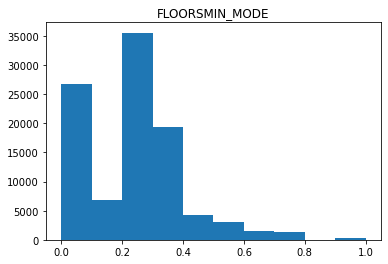

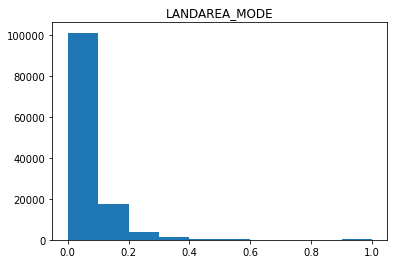

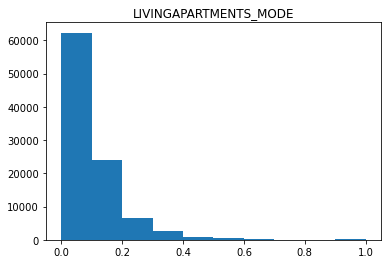

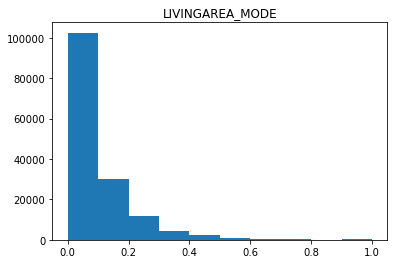

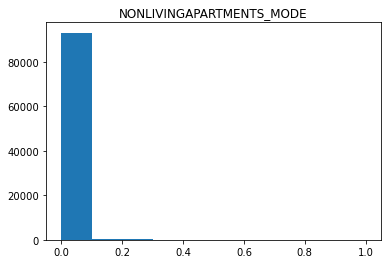

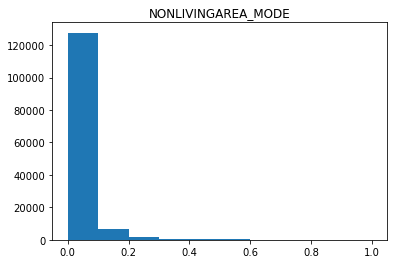

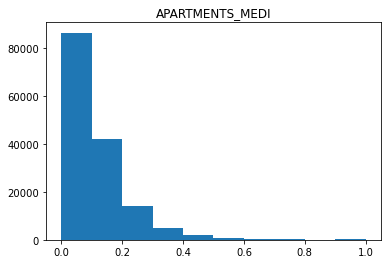

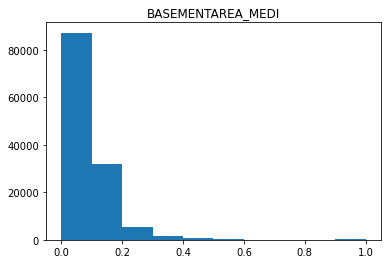

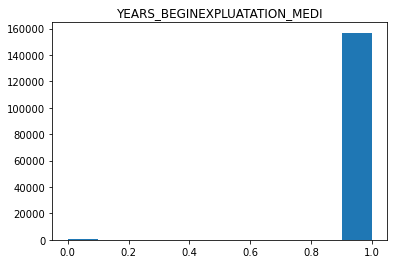

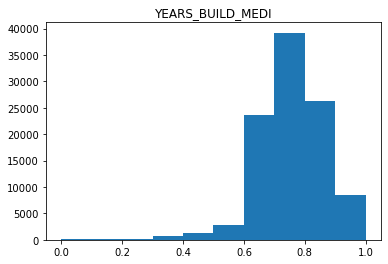

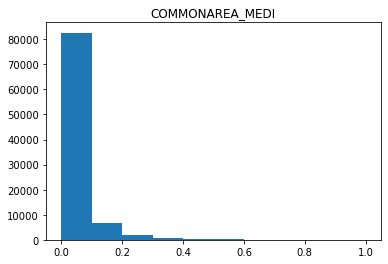

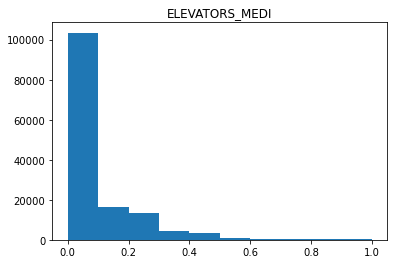

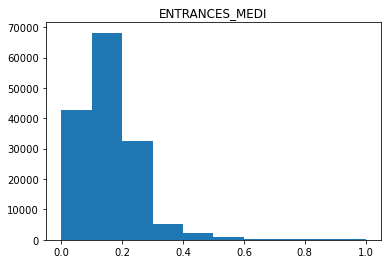

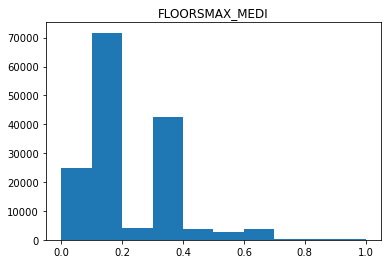

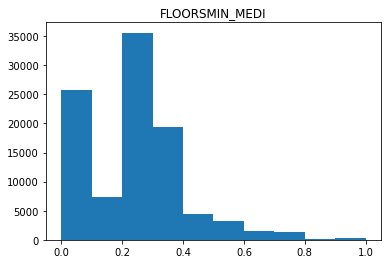

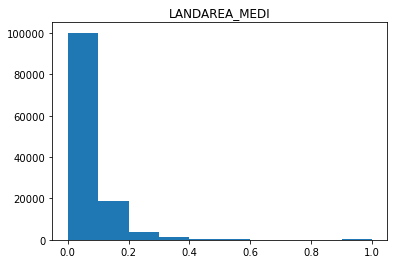

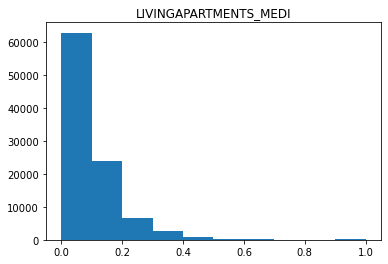

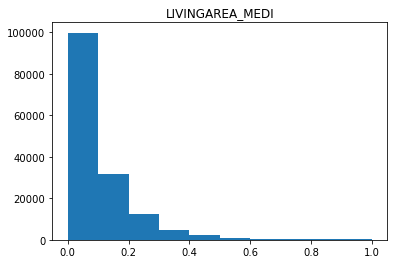

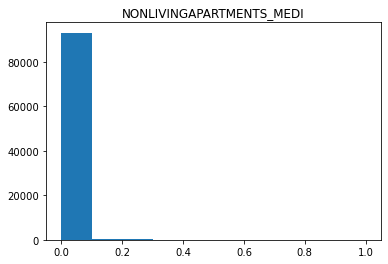

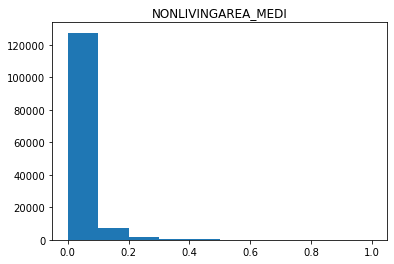

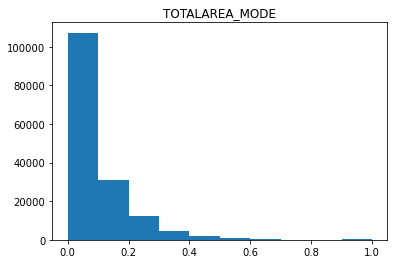

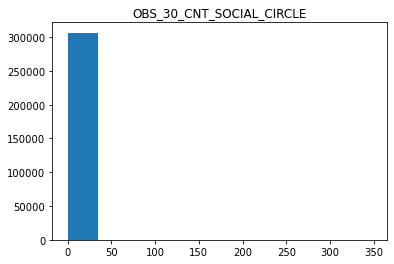

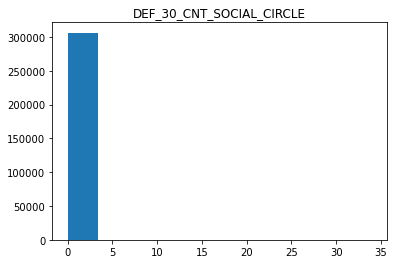

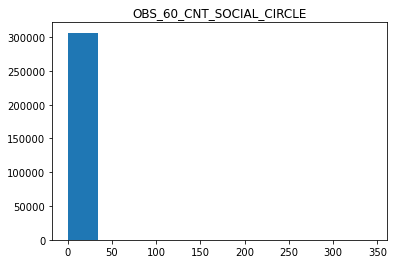

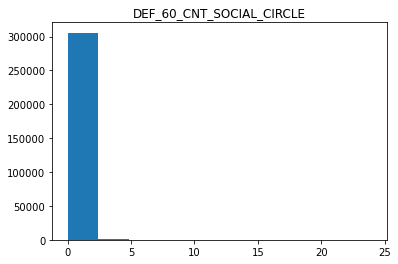

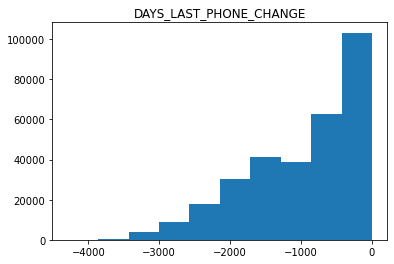

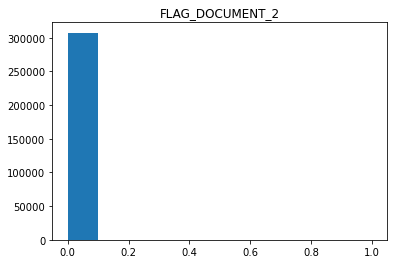

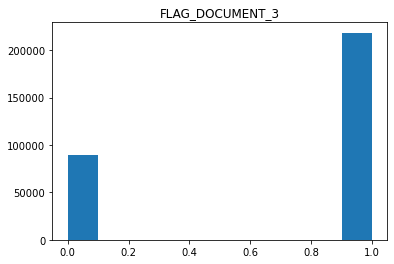

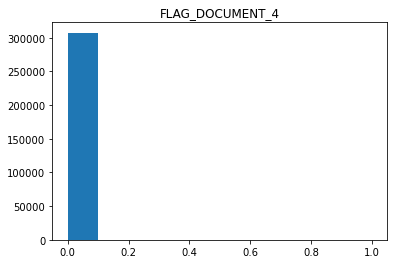

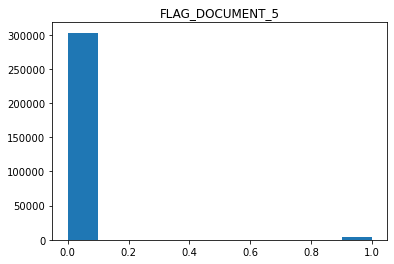

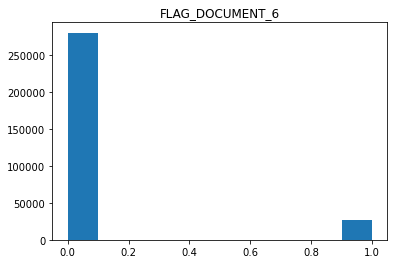

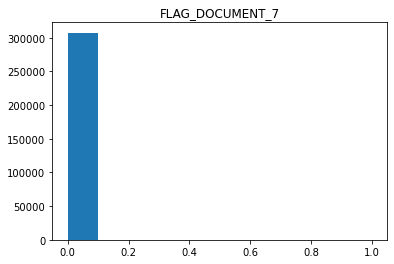

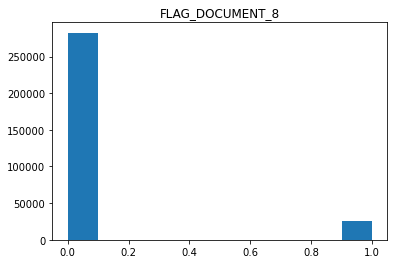

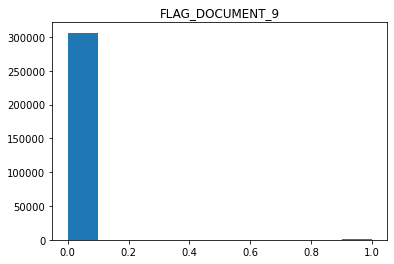

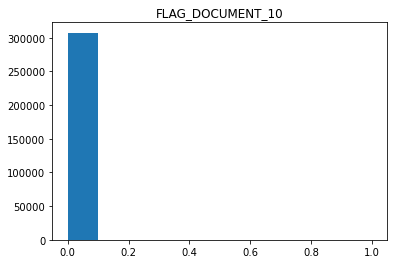

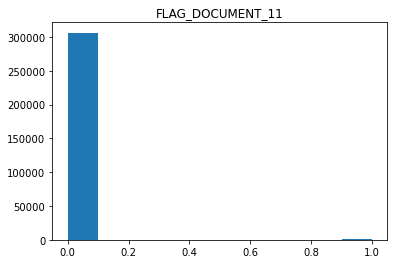

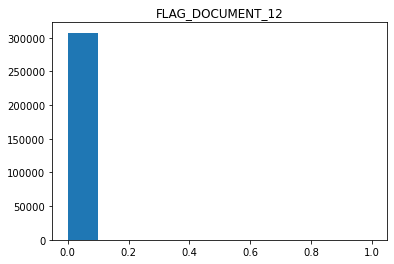

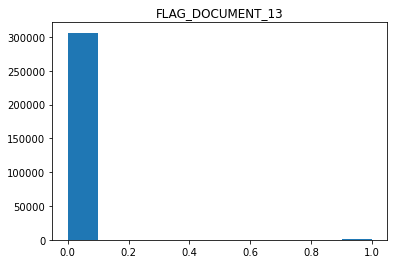

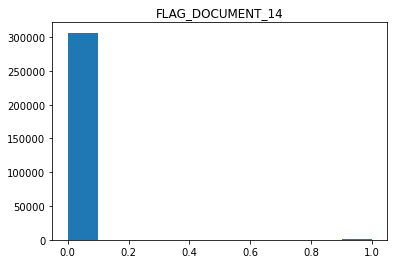

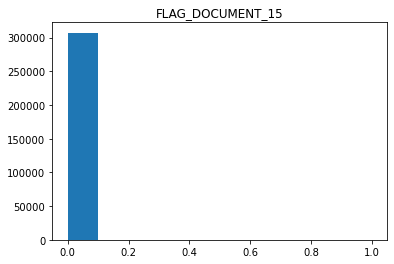

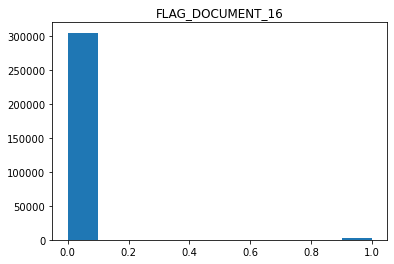

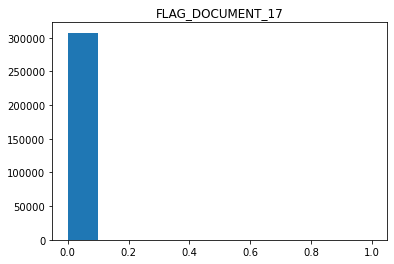

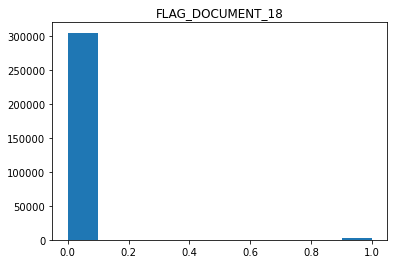

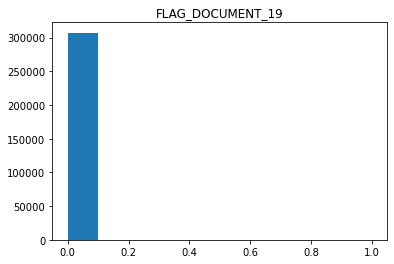

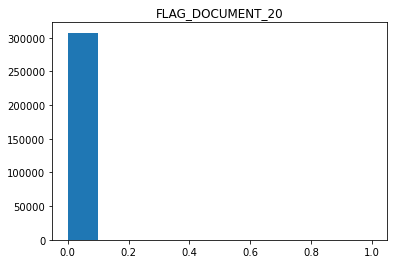

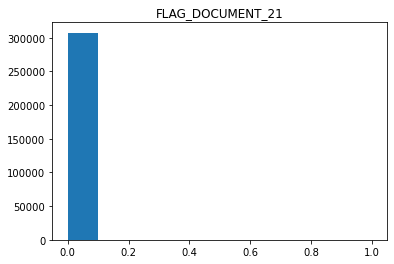

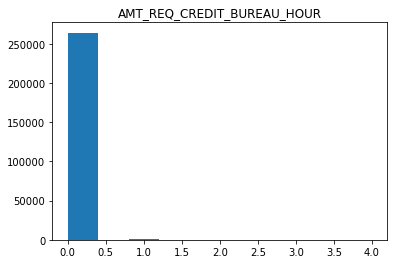

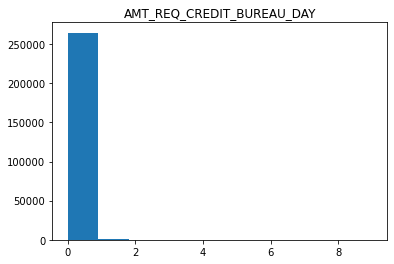

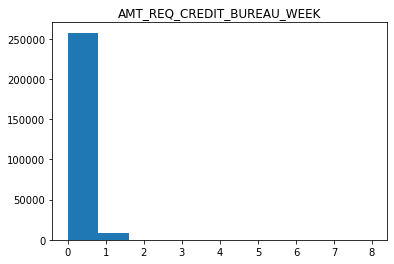

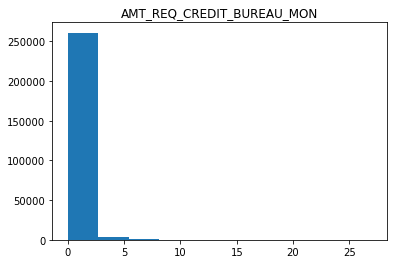

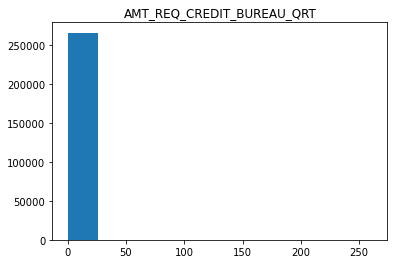

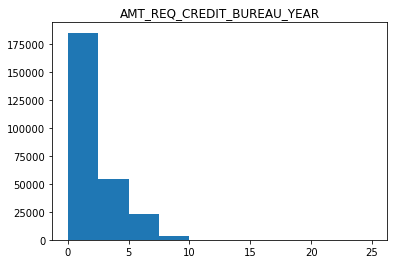

In [57]:
# Full on kagle, part: Data/Column
for i in range(122):
    if i in [11, 28, 86, 87, 89, 90]:
        continue
    plt.hist(application_train.iloc[:,i])
    plt.title("{}".format(application_train.columns[i]))
    plt.show()

### Check the outliers for each column

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\si

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\si

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\si

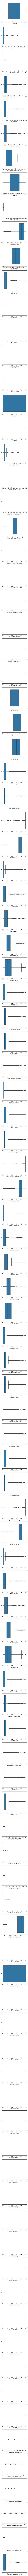

In [97]:
columns = application_train.select_dtypes(exclude="object").drop("TARGET", axis = 1).columns
fig, axs = plt.subplots(len(columns), 1, figsize = (5, 5 * len(columns)))
for i in range(len(columns)):
    column_name = columns[i]
    sns.boxplot(column_name, data = application_train, ax = axs[i])

### Correlation

In [63]:
application_train_correlation = application_train.corr()

In [64]:
application_train_correlation

SK_ID_CURR    TARGET  CNT_CHILDREN  \
SK_ID_CURR                    1.000000 -0.002108     -0.001129   
TARGET                       -0.002108  1.000000      0.019187   
CNT_CHILDREN                 -0.001129  0.019187      1.000000   
AMT_INCOME_TOTAL             -0.001820 -0.003982      0.012882   
AMT_CREDIT                   -0.000343 -0.030369      0.002145   
...                                ...       ...           ...   
AMT_REQ_CREDIT_BUREAU_DAY    -0.002193  0.002704     -0.000366   
AMT_REQ_CREDIT_BUREAU_WEEK    0.002099  0.000788     -0.002436   
AMT_REQ_CREDIT_BUREAU_MON     0.000485 -0.012462     -0.010808   
AMT_REQ_CREDIT_BUREAU_QRT     0.001025 -0.002022     -0.007836   
AMT_REQ_CREDIT_BUREAU_YEAR    0.004659  0.019930     -0.041550   

                            AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
SK_ID_CURR                         -0.001820   -0.000343    -0.000433   
TARGET                             -0.003982   -0.030369    -0.012817   
CNT_CHILDREN                        0.012882    0.002145     0.021374   
AMT_INCOME_TOTAL                    1.000000    0.156870     0.191657   
AMT_CREDIT                          0.156870    1.000000     0.770138   
...                                      ...         ...          ...   
AMT_REQ_CREDIT_BUREAU_DAY           0.002944    0.004238     0.002185   
AMT_REQ_CREDIT_BUREAU_WEEK          0.002387   -0.001275     0.013881   
AMT_REQ_CREDIT_BUREAU_MON           0.024700    0.054451     0.039148   
AMT_REQ_CREDIT_BUREAU_QRT           0.004859    0.015925     0.010124   
AMT_REQ_CREDIT_BUREAU_YEAR          0.011690   -0.048448    -0.011320   

                            AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  \
SK_ID_CURR                        -0.000232                    0.000849   
TARGET                            -0.039645                   -0.037227   
CNT_CHILDREN                      -0.001827                   -0.025573   
AMT_INCOME_TOTAL                   0.159610                    0.074796   
AMT_CREDIT                         0.986968                    0.099738   
...                                     ...                         ...   
AMT_REQ_CREDIT_BUREAU_DAY          0.004677                    0.001399   
AMT_REQ_CREDIT_BUREAU_WEEK        -0.001007                   -0.002149   
AMT_REQ_CREDIT_BUREAU_MON          0.056422                    0.078607   
AMT_REQ_CREDIT_BUREAU_QRT          0.016432                   -0.001279   
AMT_REQ_CREDIT_BUREAU_YEAR        -0.050998                    0.001003   

                            DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
SK_ID_CURR                   -0.001500       0.001366          -0.000973   
TARGET                        0.078239      -0.044932           0.041975   
CNT_CHILDREN                  0.330938      -0.239818           0.183395   
AMT_INCOME_TOTAL              0.027261      -0.064223           0.027805   
AMT_CREDIT                   -0.055436      -0.066838           0.009621   
...                                ...            ...                ...   
AMT_REQ_CREDIT_BUREAU_DAY     0.002255       0.000472          -0.000508   
AMT_REQ_CREDIT_BUREAU_WEEK   -0.001336       0.003072          -0.001069   
AMT_REQ_CREDIT_BUREAU_MON     0.001372      -0.034457          -0.011353   
AMT_REQ_CREDIT_BUREAU_QRT    -0.011799       0.015345          -0.001308   
AMT_REQ_CREDIT_BUREAU_YEAR   -0.071983       0.049988          -0.024805   

                            DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  \
SK_ID_CURR                        -0.000384     0.001818    0.002804   
TARGET                             0.051457     0.037612    0.000534   
CNT_CHILDREN                      -0.028019     0.008494    0.001041   
AMT_INCOME_TOTAL                   0.008506    -0.117273    0.000325   
AMT_CREDIT                        -0.006575    -0.094191    0.001436   
...                                     ...          ...         ...   
AMT_REQ_CREDIT_BUREAU_DAY         -0.000

#### Filter the correlation > 0.3

In [71]:
application_train_correlation_thr_03 = application_train_correlation[np.abs(application_train_correlation) > 0.3]
application_train_correlation_thr_03

SK_ID_CURR  TARGET  CNT_CHILDREN  \
SK_ID_CURR                           1.0     NaN           NaN   
TARGET                               NaN     1.0           NaN   
CNT_CHILDREN                         NaN     NaN      1.000000   
AMT_INCOME_TOTAL                     NaN     NaN           NaN   
AMT_CREDIT                           NaN     NaN           NaN   
AMT_ANNUITY                          NaN     NaN           NaN   
AMT_GOODS_PRICE                      NaN     NaN           NaN   
REGION_POPULATION_RELATIVE           NaN     NaN           NaN   
DAYS_BIRTH                           NaN     NaN      0.330938   
DAYS_EMPLOYED                        NaN     NaN           NaN   
DAYS_REGISTRATION                    NaN     NaN           NaN   
DAYS_ID_PUBLISH                      NaN     NaN           NaN   
OWN_CAR_AGE                          NaN     NaN           NaN   
FLAG_MOBIL                           NaN     NaN           NaN   
FLAG_EMP_PHONE                       NaN     NaN           NaN   
FLAG_WORK_PHONE                      NaN     NaN           NaN   
FLAG_CONT_MOBILE                     NaN     NaN           NaN   
FLAG_PHONE                           NaN     NaN           NaN   
FLAG_EMAIL                           NaN     NaN           NaN   
CNT_FAM_MEMBERS                      NaN     NaN      0.879161   
REGION_RATING_CLIENT                 NaN     NaN           NaN   
REGION_RATING_CLIENT_W_CITY          NaN     NaN           NaN   
HOUR_APPR_PROCESS_START              NaN     NaN           NaN   
REG_REGION_NOT_LIVE_REGION           NaN     NaN           NaN   
REG_REGION_NOT_WORK_REGION           NaN     NaN           NaN   
LIVE_REGION_NOT_WORK_REGION          NaN     NaN           NaN   
REG_CITY_NOT_LIVE_CITY               NaN     NaN           NaN   
REG_CITY_NOT_WORK_CITY               NaN     NaN           NaN   
LIVE_CITY_NOT_WORK_CITY              NaN     NaN           NaN   
EXT_SOURCE_1                         NaN     NaN           NaN   
EXT_SOURCE_2                         NaN     NaN           NaN   
EXT_SOURCE_3                         NaN     NaN           NaN   
APARTMENTS_AVG                       NaN     NaN           NaN   
BASEMENTAREA_AVG                     NaN     NaN           NaN   
YEARS_BEGINEXPLUATATION_AVG          NaN     NaN           NaN   
YEARS_BUILD_AVG                      NaN     NaN           NaN   
COMMONAREA_AVG                       NaN     NaN           NaN   
ELEVATORS_AVG                        NaN     NaN           NaN   
ENTRANCES_AVG                        NaN     NaN           NaN   
FLOORSMAX_AVG                        NaN     NaN           NaN   
FLOORSMIN_AVG                        NaN     NaN           NaN   
LANDAREA_AVG                         NaN     NaN           NaN   
LIVINGAPARTMENTS_AVG                 NaN     NaN           NaN   
LIVINGAREA_AVG                       NaN     NaN           NaN   
NONLIVINGAPARTMENTS_AVG              NaN     NaN           NaN   
NONLIVINGAREA_AVG                    NaN     NaN           NaN   
APARTMENTS_MODE                      NaN     NaN           NaN   
BASEMENTAREA_MODE                    NaN     NaN           NaN   
YEARS_BEGINEXPLUATATION_MODE         NaN     NaN           NaN   
YEARS_BUILD_MODE                     NaN     NaN           NaN   
COMMONAREA_MODE                      NaN     NaN           NaN   
ELEVATORS_MODE                       NaN     NaN           NaN   
ENTRANCES_MODE                       NaN     NaN           NaN   
FLOORSMAX_MODE                       NaN     NaN           NaN   
FLOORSMIN_MODE                       NaN     NaN           NaN   
LANDAREA_MODE                        NaN     NaN           NaN   
LIVINGAPARTMENTS_MODE                NaN     NaN           NaN   
LIVINGAREA_MODE                      NaN     NaN           NaN   
NONLIVINGAPARTMENTS_MODE             NaN     NaN           NaN   
NONLIVINGAREA_MODE                   NaN     NaN           NaN   
APAR

#### Filter the correlation > 0.5

In [87]:
application_train_correlation_thr_05 = application_train_correlation[np.abs(application_train_correlation) > 0.5]
application_train_correlation_thr_05

SK_ID_CURR  TARGET  CNT_CHILDREN  \
SK_ID_CURR                           1.0     NaN           NaN   
TARGET                               NaN     1.0           NaN   
CNT_CHILDREN                         NaN     NaN      1.000000   
AMT_INCOME_TOTAL                     NaN     NaN           NaN   
AMT_CREDIT                           NaN     NaN           NaN   
AMT_ANNUITY                          NaN     NaN           NaN   
AMT_GOODS_PRICE                      NaN     NaN           NaN   
REGION_POPULATION_RELATIVE           NaN     NaN           NaN   
DAYS_BIRTH                           NaN     NaN           NaN   
DAYS_EMPLOYED                        NaN     NaN           NaN   
DAYS_REGISTRATION                    NaN     NaN           NaN   
DAYS_ID_PUBLISH                      NaN     NaN           NaN   
OWN_CAR_AGE                          NaN     NaN           NaN   
FLAG_MOBIL                           NaN     NaN           NaN   
FLAG_EMP_PHONE                       NaN     NaN           NaN   
FLAG_WORK_PHONE                      NaN     NaN           NaN   
FLAG_CONT_MOBILE                     NaN     NaN           NaN   
FLAG_PHONE                           NaN     NaN           NaN   
FLAG_EMAIL                           NaN     NaN           NaN   
CNT_FAM_MEMBERS                      NaN     NaN      0.879161   
REGION_RATING_CLIENT                 NaN     NaN           NaN   
REGION_RATING_CLIENT_W_CITY          NaN     NaN           NaN   
HOUR_APPR_PROCESS_START              NaN     NaN           NaN   
REG_REGION_NOT_LIVE_REGION           NaN     NaN           NaN   
REG_REGION_NOT_WORK_REGION           NaN     NaN           NaN   
LIVE_REGION_NOT_WORK_REGION          NaN     NaN           NaN   
REG_CITY_NOT_LIVE_CITY               NaN     NaN           NaN   
REG_CITY_NOT_WORK_CITY               NaN     NaN           NaN   
LIVE_CITY_NOT_WORK_CITY              NaN     NaN           NaN   
EXT_SOURCE_1                         NaN     NaN           NaN   
EXT_SOURCE_2                         NaN     NaN           NaN   
EXT_SOURCE_3                         NaN     NaN           NaN   
APARTMENTS_AVG                       NaN     NaN           NaN   
BASEMENTAREA_AVG                     NaN     NaN           NaN   
YEARS_BEGINEXPLUATATION_AVG          NaN     NaN           NaN   
YEARS_BUILD_AVG                      NaN     NaN           NaN   
COMMONAREA_AVG                       NaN     NaN           NaN   
ELEVATORS_AVG                        NaN     NaN           NaN   
ENTRANCES_AVG                        NaN     NaN           NaN   
FLOORSMAX_AVG                        NaN     NaN           NaN   
FLOORSMIN_AVG                        NaN     NaN           NaN   
LANDAREA_AVG                         NaN     NaN           NaN   
LIVINGAPARTMENTS_AVG                 NaN     NaN           NaN   
LIVINGAREA_AVG                       NaN     NaN           NaN   
NONLIVINGAPARTMENTS_AVG              NaN     NaN           NaN   
NONLIVINGAREA_AVG                    NaN     NaN           NaN   
APARTMENTS_MODE                      NaN     NaN           NaN   
BASEMENTAREA_MODE                    NaN     NaN           NaN   
YEARS_BEGINEXPLUATATION_MODE         NaN     NaN           NaN   
YEARS_BUILD_MODE                     NaN     NaN           NaN   
COMMONAREA_MODE                      NaN     NaN           NaN   
ELEVATORS_MODE                       NaN     NaN           NaN   
ENTRANCES_MODE                       NaN     NaN           NaN   
FLOORSMAX_MODE                       NaN     NaN           NaN   
FLOORSMIN_MODE                       NaN     NaN           NaN   
LANDAREA_MODE                        NaN     NaN           NaN   
LIVINGAPARTMENTS_MODE                NaN     NaN           NaN   
LIVINGAREA_MODE                      NaN     NaN           NaN   
NONLIVINGAPARTMENTS_MODE             NaN     NaN           NaN   
NONLIVINGAREA_MODE                   NaN     NaN           NaN   
APAR

In [86]:
for i in range(106):
    for j in range(106):
        if not np.isnan(application_train_correlation_thr_03.iloc[i, j]) and application_train_correlation_thr_03.iloc[i, j] != 1:
            print(application_train_correlation_thr_03.columns[i], application_train_correlation_thr_03.index[j], application_train_correlation_thr_03.iloc[i, j])

CNT_CHILDREN DAYS_BIRTH 0.33093766811457903
CNT_CHILDREN CNT_FAM_MEMBERS 0.879160640438957
AMT_CREDIT AMT_ANNUITY 0.7701380033118846
AMT_CREDIT AMT_GOODS_PRICE 0.9869683054221499
AMT_ANNUITY AMT_CREDIT 0.7701380033118846
AMT_ANNUITY AMT_GOODS_PRICE 0.7751092733120319
AMT_GOODS_PRICE AMT_CREDIT 0.9869683054221499
AMT_GOODS_PRICE AMT_ANNUITY 0.7751092733120319
REGION_POPULATION_RELATIVE REGION_RATING_CLIENT -0.5328765312383351
REGION_POPULATION_RELATIVE REGION_RATING_CLIENT_W_CITY -0.5315354521931355
REGION_POPULATION_RELATIVE FLOORSMAX_AVG 0.32265151425952027
REGION_POPULATION_RELATIVE FLOORSMAX_MODE 0.30399202755537136
REGION_POPULATION_RELATIVE FLOORSMAX_MEDI 0.31831898445080226
DAYS_BIRTH CNT_CHILDREN 0.33093766811457903
DAYS_BIRTH DAYS_EMPLOYED -0.6158641964711599
DAYS_BIRTH DAYS_REGISTRATION 0.33191208228535374
DAYS_BIRTH FLAG_EMP_PHONE 0.6198876962023361
DAYS_BIRTH EXT_SOURCE_1 -0.6006099739503155
DAYS_BIRTH FLAG_DOCUMENT_6 -0.40716019308993434
DAYS_EMPLOYED DAYS_BIRTH -0.61586419

NONLIVINGAREA_MODE NONLIVINGAREA_AVG 0.9660865524294072
NONLIVINGAREA_MODE NONLIVINGAREA_MEDI 0.9758385272985102
NONLIVINGAREA_MODE TOTALAREA_MODE 0.3469568950419287
APARTMENTS_MEDI APARTMENTS_AVG 0.9950808157888431
APARTMENTS_MEDI BASEMENTAREA_AVG 0.6781741288017071
APARTMENTS_MEDI YEARS_BUILD_AVG 0.3393241070111522
APARTMENTS_MEDI COMMONAREA_AVG 0.5381200314932504
APARTMENTS_MEDI ELEVATORS_AVG 0.834522676712717
APARTMENTS_MEDI ENTRANCES_AVG 0.6115870384723224
APARTMENTS_MEDI FLOORSMAX_AVG 0.6152429053148205
APARTMENTS_MEDI FLOORSMIN_AVG 0.44210790816542045
APARTMENTS_MEDI LANDAREA_AVG 0.49751984164032853
APARTMENTS_MEDI LIVINGAPARTMENTS_AVG 0.9355783034002807
APARTMENTS_MEDI LIVINGAREA_AVG 0.9125041767239913
APARTMENTS_MEDI APARTMENTS_MODE 0.9771930586912569
APARTMENTS_MEDI BASEMENTAREA_MODE 0.663955057224102
APARTMENTS_MEDI YEARS_BUILD_MODE 0.3386139862260736
APARTMENTS_MEDI COMMONAREA_MODE 0.5315767188561649
APARTMENTS_MEDI ELEVATORS_MODE 0.8256192782733649
APARTMENTS_MEDI ENTRANCE

#### List out the correlation > 0.5

In [88]:
for i in range(106):
    for j in range(106):
        if not np.isnan(application_train_correlation_thr_05.iloc[i, j]) and application_train_correlation_thr_05.iloc[i, j] != 1:
            print(application_train_correlation_thr_05.columns[i], application_train_correlation_thr_05.index[j], application_train_correlation_thr_05.iloc[i, j])

CNT_CHILDREN CNT_FAM_MEMBERS 0.879160640438957
AMT_CREDIT AMT_ANNUITY 0.7701380033118846
AMT_CREDIT AMT_GOODS_PRICE 0.9869683054221499
AMT_ANNUITY AMT_CREDIT 0.7701380033118846
AMT_ANNUITY AMT_GOODS_PRICE 0.7751092733120319
AMT_GOODS_PRICE AMT_CREDIT 0.9869683054221499
AMT_GOODS_PRICE AMT_ANNUITY 0.7751092733120319
REGION_POPULATION_RELATIVE REGION_RATING_CLIENT -0.5328765312383351
REGION_POPULATION_RELATIVE REGION_RATING_CLIENT_W_CITY -0.5315354521931355
DAYS_BIRTH DAYS_EMPLOYED -0.6158641964711599
DAYS_BIRTH FLAG_EMP_PHONE 0.6198876962023361
DAYS_BIRTH EXT_SOURCE_1 -0.6006099739503155
DAYS_EMPLOYED DAYS_BIRTH -0.6158641964711599
DAYS_EMPLOYED FLAG_EMP_PHONE -0.999755011444388
DAYS_EMPLOYED FLAG_DOCUMENT_6 0.597484437373503
FLAG_EMP_PHONE DAYS_BIRTH 0.6198876962023361
FLAG_EMP_PHONE DAYS_EMPLOYED -0.999755011444388
FLAG_EMP_PHONE FLAG_DOCUMENT_6 -0.5977318081296296
CNT_FAM_MEMBERS CNT_CHILDREN 0.879160640438957
REGION_RATING_CLIENT REGION_POPULATION_RELATIVE -0.5328765312383351
REGION

FLOORSMIN_MEDI ELEVATORS_AVG 0.5094501262124892
FLOORSMIN_MEDI FLOORSMAX_AVG 0.7398936452225403
FLOORSMIN_MEDI FLOORSMIN_AVG 0.9972409850180423
FLOORSMIN_MEDI FLOORSMAX_MODE 0.7298710195195898
FLOORSMIN_MEDI FLOORSMIN_MODE 0.9884055900499595
FLOORSMIN_MEDI ELEVATORS_MEDI 0.5087982577887954
FLOORSMIN_MEDI FLOORSMAX_MEDI 0.7404123089687457
LANDAREA_MEDI ENTRANCES_AVG 0.5111404843254417
LANDAREA_MEDI LANDAREA_AVG 0.9916095332482726
LANDAREA_MEDI LIVINGAREA_AVG 0.5035064806977775
LANDAREA_MEDI APARTMENTS_MODE 0.5014396299883833
LANDAREA_MEDI ENTRANCES_MODE 0.5012372338667126
LANDAREA_MEDI LANDAREA_MODE 0.9808354923366361
LANDAREA_MEDI LIVINGAREA_MODE 0.5055293713930451
LANDAREA_MEDI APARTMENTS_MEDI 0.5008476292750983
LANDAREA_MEDI ENTRANCES_MEDI 0.5105865798780932
LANDAREA_MEDI LIVINGAREA_MEDI 0.5038903379627432
LIVINGAPARTMENTS_MEDI APARTMENTS_AVG 0.9419070556828196
LIVINGAPARTMENTS_MEDI BASEMENTAREA_AVG 0.6488018911566368
LIVINGAPARTMENTS_MEDI COMMONAREA_AVG 0.5344539359455944
LIVINGAPAR

#### List out the correlation > 0.9

In [114]:
application_train_correlation_thr_09 = application_train_correlation[np.abs(application_train_correlation) > 0.9]
application_train_correlation_thr_09

SK_ID_CURR  TARGET  CNT_CHILDREN  \
SK_ID_CURR                           1.0     NaN           NaN   
TARGET                               NaN     1.0           NaN   
CNT_CHILDREN                         NaN     NaN           1.0   
AMT_INCOME_TOTAL                     NaN     NaN           NaN   
AMT_CREDIT                           NaN     NaN           NaN   
AMT_ANNUITY                          NaN     NaN           NaN   
AMT_GOODS_PRICE                      NaN     NaN           NaN   
REGION_POPULATION_RELATIVE           NaN     NaN           NaN   
DAYS_BIRTH                           NaN     NaN           NaN   
DAYS_EMPLOYED                        NaN     NaN           NaN   
DAYS_REGISTRATION                    NaN     NaN           NaN   
DAYS_ID_PUBLISH                      NaN     NaN           NaN   
OWN_CAR_AGE                          NaN     NaN           NaN   
FLAG_MOBIL                           NaN     NaN           NaN   
FLAG_EMP_PHONE                       NaN     NaN           NaN   
FLAG_WORK_PHONE                      NaN     NaN           NaN   
FLAG_CONT_MOBILE                     NaN     NaN           NaN   
FLAG_PHONE                           NaN     NaN           NaN   
FLAG_EMAIL                           NaN     NaN           NaN   
CNT_FAM_MEMBERS                      NaN     NaN           NaN   
REGION_RATING_CLIENT                 NaN     NaN           NaN   
REGION_RATING_CLIENT_W_CITY          NaN     NaN           NaN   
HOUR_APPR_PROCESS_START              NaN     NaN           NaN   
REG_REGION_NOT_LIVE_REGION           NaN     NaN           NaN   
REG_REGION_NOT_WORK_REGION           NaN     NaN           NaN   
LIVE_REGION_NOT_WORK_REGION          NaN     NaN           NaN   
REG_CITY_NOT_LIVE_CITY               NaN     NaN           NaN   
REG_CITY_NOT_WORK_CITY               NaN     NaN           NaN   
LIVE_CITY_NOT_WORK_CITY              NaN     NaN           NaN   
EXT_SOURCE_1                         NaN     NaN           NaN   
EXT_SOURCE_2                         NaN     NaN           NaN   
EXT_SOURCE_3                         NaN     NaN           NaN   
APARTMENTS_AVG                       NaN     NaN           NaN   
BASEMENTAREA_AVG                     NaN     NaN           NaN   
YEARS_BEGINEXPLUATATION_AVG          NaN     NaN           NaN   
YEARS_BUILD_AVG                      NaN     NaN           NaN   
COMMONAREA_AVG                       NaN     NaN           NaN   
ELEVATORS_AVG                        NaN     NaN           NaN   
ENTRANCES_AVG                        NaN     NaN           NaN   
FLOORSMAX_AVG                        NaN     NaN           NaN   
FLOORSMIN_AVG                        NaN     NaN           NaN   
LANDAREA_AVG                         NaN     NaN           NaN   
LIVINGAPARTMENTS_AVG                 NaN     NaN           NaN   
LIVINGAREA_AVG                       NaN     NaN           NaN   
NONLIVINGAPARTMENTS_AVG              NaN     NaN           NaN   
NONLIVINGAREA_AVG                    NaN     NaN           NaN   
APARTMENTS_MODE                      NaN     NaN           NaN   
BASEMENTAREA_MODE                    NaN     NaN           NaN   
YEARS_BEGINEXPLUATATION_MODE         NaN     NaN           NaN   
YEARS_BUILD_MODE                     NaN     NaN           NaN   
COMMONAREA_MODE                      NaN     NaN           NaN   
ELEVATORS_MODE                       NaN     NaN           NaN   
ENTRANCES_MODE                       NaN     NaN           NaN   
FLOORSMAX_MODE                       NaN     NaN           NaN   
FLOORSMIN_MODE                       NaN     NaN           NaN   
LANDAREA_MODE                        NaN     NaN           NaN   
LIVINGAPARTMENTS_MODE                NaN     NaN           NaN   
LIVINGAREA_MODE                      NaN     NaN           NaN   
NONLIVINGAPARTMENTS_MODE             NaN     NaN           NaN   
NONLIVINGAREA_MODE                   NaN     NaN           NaN   
APAR

In [117]:
for i in range(106):
    for j in range(106):
        if not np.isnan(application_train_correlation_thr_09.iloc[i, j]) and application_train_correlation_thr_09.iloc[i, j] != 1:
            print(application_train_correlation_thr_09.columns[i], application_train_correlation_thr_09.index[j], application_train_correlation_thr_09.iloc[i, j])

AMT_CREDIT AMT_GOODS_PRICE 0.9869683054221499
AMT_GOODS_PRICE AMT_CREDIT 0.9869683054221499
DAYS_EMPLOYED FLAG_EMP_PHONE -0.999755011444388
FLAG_EMP_PHONE DAYS_EMPLOYED -0.999755011444388
REGION_RATING_CLIENT REGION_RATING_CLIENT_W_CITY 0.9508422141646482
REGION_RATING_CLIENT_W_CITY REGION_RATING_CLIENT 0.9508422141646482
APARTMENTS_AVG LIVINGAPARTMENTS_AVG 0.9439521423343666
APARTMENTS_AVG LIVINGAREA_AVG 0.9136187582503591
APARTMENTS_AVG APARTMENTS_MODE 0.9732594628521724
APARTMENTS_AVG LIVINGAPARTMENTS_MODE 0.9305540836147111
APARTMENTS_AVG APARTMENTS_MEDI 0.9950808157888431
APARTMENTS_AVG LIVINGAPARTMENTS_MEDI 0.9419070556828196
APARTMENTS_AVG LIVINGAREA_MEDI 0.912329573424
BASEMENTAREA_AVG BASEMENTAREA_MODE 0.9734957846660562
BASEMENTAREA_AVG BASEMENTAREA_MEDI 0.994317337521952
YEARS_BEGINEXPLUATATION_AVG YEARS_BEGINEXPLUATATION_MODE 0.9718933677077852
YEARS_BEGINEXPLUATATION_AVG YEARS_BEGINEXPLUATATION_MEDI 0.9938254172943787
YEARS_BUILD_AVG YEARS_BUILD_MODE 0.989443921960819
YEAR

In [149]:
## We will drop these columns in the cleaning part:
to_drop_cols = ["AMT_GOODS_PRICE", "FLAG_EMP_PHONE", "REGION_RATING_CLIENT", "APARTMENTS_MODE", "LIVINGAPARTMENTS_MODE",
                "APARTMENTS_MEDI", "LIVINGAPARTMENTS_MEDI", "LIVINGAREA_MEDI", "BASEMENTAREA_MODE", "BASEMENTAREA_MEDI",
               "YEARS_BEGINEXPLUATATION_MODE", "YEARS_BEGINEXPLUATATION_MEDI", "YEARS_BUILD_MODE", "YEARS_BUILD_MEDI",
               "COMMONAREA_MODE", "COMMONAREA_MEDI", "ELEVATORS_MODE", "ELEVATORS_MEDI", "ENTRANCES_MODE", "ENTRANCES_MEDI",
               "FLOORSMAX_MODE", "FLOORSMAX_MEDI", "FLOORSMIN_MODE", "FLOORSMIN_MEDI", "LANDAREA_MODE", "LANDAREA_MEDI",
               "APARTMENTS_MODE", "LIVINGAPARTMENTS_MODE", "APARTMENTS_MEDI", "LIVINGAPARTMENTS_MEDI", "LIVINGAREA_MODE",
               "LIVINGAREA_MEDI", "TOTALAREA_MODE", "NONLIVINGAPARTMENTS_MODE", "NONLIVINGAPARTMENTS_MEDI", "OBS_30_CNT_SOCIAL_CIRCLE",
               "NONLIVINGAREA_MEDI", "NONLIVINGAREA_MODE"]



### Check some columns which has most of observations fall on only one value

In [121]:
application_train["FLAG_MOBIL"].value_counts(normalize = True)

1    0.999997
0    0.000003
Name: FLAG_MOBIL, dtype: float64

#### => Drop "FLAG_MOBIL" column.

In [123]:
application_train["FLAG_CONT_MOBILE"].value_counts(normalize = True)

1    0.998133
0    0.001867
Name: FLAG_CONT_MOBILE, dtype: float64

#### => Drop "FLAG_CONT_MOBIL" column.

In [124]:
application_train["FLAG_EMAIL"].value_counts(normalize = True)

0    0.94328
1    0.05672
Name: FLAG_EMAIL, dtype: float64

In [125]:
application_train["OCCUPATION_TYPE"].value_counts(normalize = True)

Laborers                 0.261396
Sales staff              0.152056
Core staff               0.130589
Managers                 0.101227
Drivers                  0.088116
High skill tech staff    0.053903
Accountants              0.046481
Medicine staff           0.040437
Security staff           0.031835
Cooking staff            0.028164
Cleaning staff           0.022040
Private service staff    0.012562
Low-skill Laborers       0.009914
Waiters/barmen staff     0.006385
Secretaries              0.006181
Realty agents            0.003557
HR staff                 0.002667
IT staff                 0.002491
Name: OCCUPATION_TYPE, dtype: float64

In [126]:
application_train["REG_REGION_NOT_LIVE_REGION"].value_counts(normalize = True)

0    0.984856
1    0.015144
Name: REG_REGION_NOT_LIVE_REGION, dtype: float64

In [127]:
application_train["REG_REGION_NOT_WORK_REGION"].value_counts(normalize = True)

0    0.949231
1    0.050769
Name: REG_REGION_NOT_WORK_REGION, dtype: float64

In [128]:
application_train["LIVE_REGION_NOT_WORK_REGION"].value_counts(normalize = True)

0    0.959341
1    0.040659
Name: LIVE_REGION_NOT_WORK_REGION, dtype: float64

#### => Drop "LIVE_REGION_NOT_WORK_REGION" column

In [129]:
application_train["FONDKAPREMONT_MODE"].value_counts(normalize = True)

reg oper account         0.759443
reg oper spec account    0.124259
not specified            0.058499
org spec account         0.057799
Name: FONDKAPREMONT_MODE, dtype: float64

In [130]:
application_train["FLAG_DOCUMENT_2"].value_counts(normalize = True)

0    0.999958
1    0.000042
Name: FLAG_DOCUMENT_2, dtype: float64

#### => Drop "FLAG_DOCUMENT_2" column

In [131]:
application_train["FLAG_DOCUMENT_4"].value_counts(normalize = True)

0    0.999919
1    0.000081
Name: FLAG_DOCUMENT_4, dtype: float64

In [132]:
application_train["FLAG_DOCUMENT_5"].value_counts(normalize = True)

0    0.984885
1    0.015115
Name: FLAG_DOCUMENT_5, dtype: float64

In [133]:
application_train["FLAG_DOCUMENT_7"].value_counts(normalize = True)

0    0.999808
1    0.000192
Name: FLAG_DOCUMENT_7, dtype: float64

In [134]:
application_train["FLAG_DOCUMENT_9"].value_counts(normalize = True)

0    0.996104
1    0.003896
Name: FLAG_DOCUMENT_9, dtype: float64

In [135]:
# Similar for FLAG_DOCUMENT_10 to FLAG_DOCUMENT_21

#### => Drop "FLAG_DOCUMENT_4", "5", "7", "9", "10", ..." 21" column

### Histplot to see each variable to the "TARGET" variable

In [92]:
columns = application_train.select_dtypes(exclude="object").drop("TARGET", axis = 1).columns

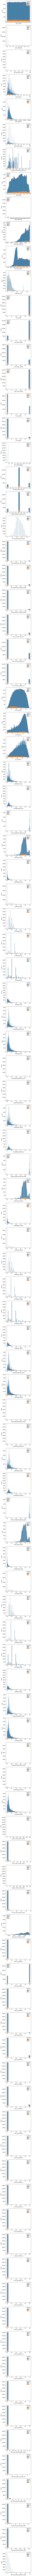

In [93]:
fig, axs = plt.subplots(len(columns), 1, figsize = (5, 5 * len(columns)))
for i in range(len(columns)):
    column_name = columns[i]
    sns.histplot(application_train, x = column_name, hue = "TARGET", multiple="stack", ax = axs[i])

### Find correlations with the target and sort

In [94]:
# Find correlations with the target and sort
correlations = application_train.corr()['TARGET'].sort_values()

# Display correlations
print('Most Positive Correlations:\n', correlations.tail(15))
print('\nMost Negative Correlations:\n', correlations.head(15))

Most Positive Correlations:
 DEF_60_CNT_SOCIAL_CIRCLE       0.031276
DEF_30_CNT_SOCIAL_CIRCLE       0.032248
LIVE_CITY_NOT_WORK_CITY        0.032518
OWN_CAR_AGE                    0.037612
DAYS_REGISTRATION              0.041975
FLAG_DOCUMENT_3                0.044346
REG_CITY_NOT_LIVE_CITY         0.044395
FLAG_EMP_PHONE                 0.045982
REG_CITY_NOT_WORK_CITY         0.050994
DAYS_ID_PUBLISH                0.051457
DAYS_LAST_PHONE_CHANGE         0.055218
REGION_RATING_CLIENT           0.058899
REGION_RATING_CLIENT_W_CITY    0.060893
DAYS_BIRTH                     0.078239
TARGET                         1.000000
Name: TARGET, dtype: float64

Most Negative Correlations:
 EXT_SOURCE_3                 -0.178919
EXT_SOURCE_2                 -0.160472
EXT_SOURCE_1                 -0.155317
DAYS_EMPLOYED                -0.044932
FLOORSMAX_AVG                -0.044003
FLOORSMAX_MEDI               -0.043768
FLOORSMAX_MODE               -0.043226
AMT_GOODS_PRICE              -0.039645


### Use age information to see relationship with the target

In [99]:
# Age information into a separate dataframe
age_data = abs(application_train[['TARGET', 'DAYS_BIRTH']])
age_data['YEARS_BIRTH'] = age_data['DAYS_BIRTH'] / 365

# Bin the age data
age_data['YEARS_BINNED'] = pd.cut(age_data['YEARS_BIRTH'], bins = np.linspace(20, 70, num = 11))
age_data.head(10)

TARGET  DAYS_BIRTH  YEARS_BIRTH  YEARS_BINNED
0       1        9461    25.920548  (25.0, 30.0]
1       0       16765    45.931507  (45.0, 50.0]
2       0       19046    52.180822  (50.0, 55.0]
3       0       19005    52.068493  (50.0, 55.0]
4       0       19932    54.608219  (50.0, 55.0]
5       0       16941    46.413699  (45.0, 50.0]
6       0       13778    37.747945  (35.0, 40.0]
7       0       18850    51.643836  (50.0, 55.0]
8       0       20099    55.065753  (55.0, 60.0]
9       0       14469    39.641096  (35.0, 40.0]

In [100]:
# Group by the bin and calculate averages
age_groups  = age_data.groupby('YEARS_BINNED').mean()
age_groups

TARGET    DAYS_BIRTH  YEARS_BIRTH
YEARS_BINNED                                     
(20.0, 25.0]  0.123036   8532.795625    23.377522
(25.0, 30.0]  0.111436  10155.219250    27.822518
(30.0, 35.0]  0.102814  11854.848377    32.479037
(35.0, 40.0]  0.089414  13707.908253    37.555913
(40.0, 45.0]  0.078491  15497.661233    42.459346
(45.0, 50.0]  0.074171  17323.900441    47.462741
(50.0, 55.0]  0.066968  19196.494791    52.593136
(55.0, 60.0]  0.055314  20984.262742    57.491131
(60.0, 65.0]  0.052737  22780.547460    62.412459
(65.0, 70.0]  0.037270  24292.614340    66.555108

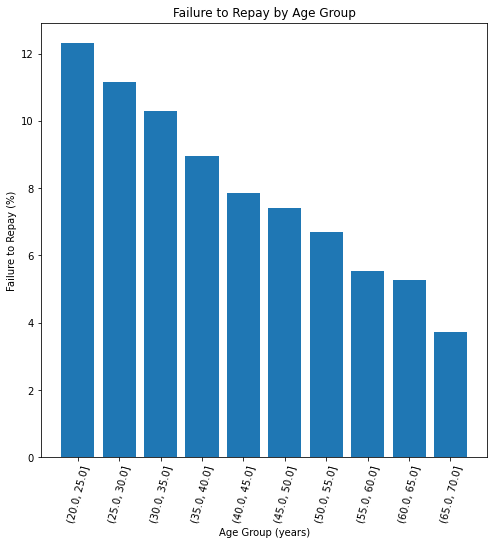

In [101]:
plt.figure(figsize = (8, 8))

# Graph the age bins and the average of the target as a bar plot
plt.bar(age_groups.index.astype(str), 100 * age_groups['TARGET'])

# Plot labeling
plt.xticks(rotation = 75); plt.xlabel('Age Group (years)'); plt.ylabel('Failure to Repay (%)')
plt.title('Failure to Repay by Age Group');

### There is a clear trend: younger applicants are more likely to not repay the loan! The rate of failure to repay is above 10% for the youngest three age groups and beolow 5% for the oldest age group.

This is information that could be directly used by the bank: because younger clients are less likely to repay the loan, maybe they should be provided with more guidance or financial planning tips. This does not mean the bank should discriminate against younger clients, but it would be smart to take precautionary measures to help younger clients pay on time.

## Exterior Sources
The 3 variables with the strongest negative correlations with the target are EXT_SOURCE_1, EXT_SOURCE_2, and EXT_SOURCE_3. According to the documentation, these features represent a "normalized score from external data source". I'm not sure what this exactly means, but it may be a cumulative sort of credit rating made using numerous sources of data.

Let's take a look at these variables.

First, we can show the correlations of the EXT_SOURCE features with the target and with each other.

In [102]:
# Extract the EXT_SOURCE variables and show correlations
ext_data = application_train[['TARGET', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']]
ext_data_corrs = ext_data.corr()
ext_data_corrs

TARGET  EXT_SOURCE_1  EXT_SOURCE_2  EXT_SOURCE_3  DAYS_BIRTH
TARGET        1.000000     -0.155317     -0.160472     -0.178919    0.078239
EXT_SOURCE_1 -0.155317      1.000000      0.213982      0.186846   -0.600610
EXT_SOURCE_2 -0.160472      0.213982      1.000000      0.109167   -0.091996
EXT_SOURCE_3 -0.178919      0.186846      0.109167      1.000000   -0.205478
DAYS_BIRTH    0.078239     -0.600610     -0.091996     -0.205478    1.000000

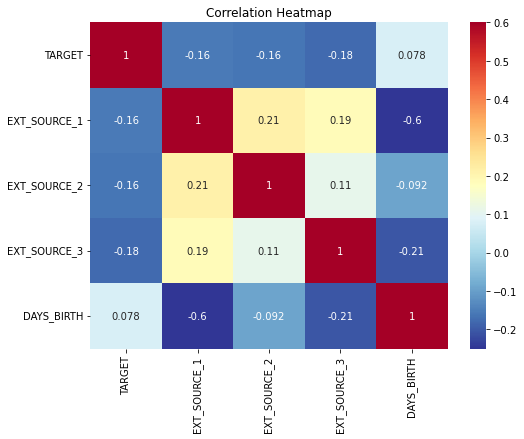

In [103]:
plt.figure(figsize = (8, 6))

# Heatmap of correlations
sns.heatmap(ext_data_corrs, cmap = plt.cm.RdYlBu_r, vmin = -0.25, annot = True, vmax = 0.6)
plt.title('Correlation Heatmap');

All three EXT_SOURCE featureshave negative correlations with the target, indicating that as the value of the EXT_SOURCE increases, the client is more likely to repay the loan. We can also see that DAYS_BIRTH is positively correlated with EXT_SOURCE_1 indicating that maybe one of the factors in this score is the client age.

Next we can look at the distribution of each of these features colored by the value of the target. This will let us visualize the effect of this variable on the target.

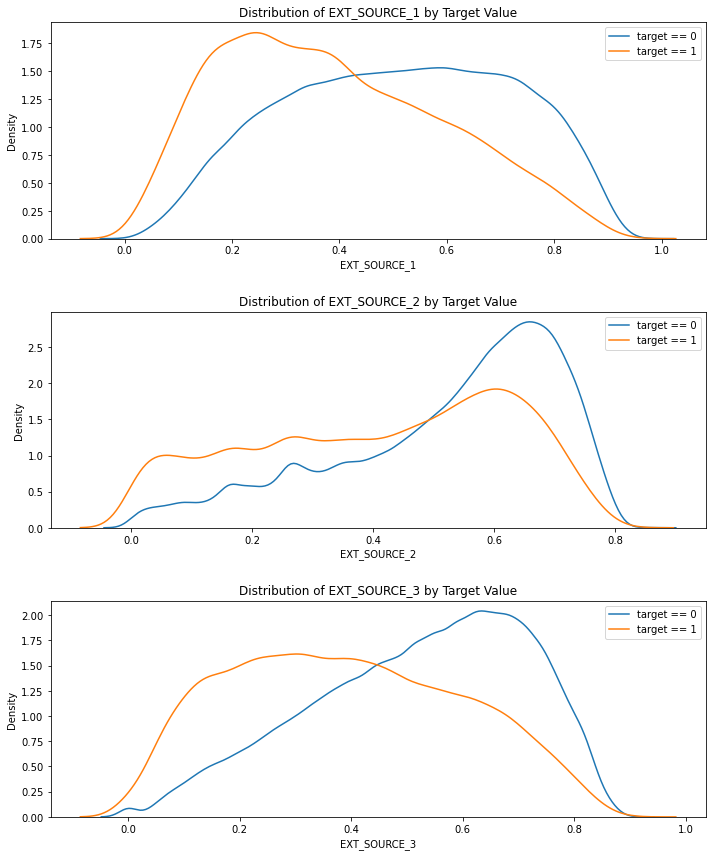

In [107]:
plt.figure(figsize = (10, 12))

# iterate through the sources
for i, source in enumerate(['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']):
    
    # create a new subplot for each source
    plt.subplot(3, 1, i + 1)
    # plot repaid loans
    sns.kdeplot(application_train.loc[application_train['TARGET'] == 0, source], label = 'target == 0')
    # plot loans that were not repaid
    sns.kdeplot(application_train.loc[application_train['TARGET'] == 1, source], label = 'target == 1')
    
    # Label the plots
    plt.title('Distribution of %s by Target Value' % source)
    plt.xlabel('%s' % source); plt.ylabel('Density');
    plt.legend()
    
plt.tight_layout(h_pad = 2.5)

    

## Domain Knowledge Features
Maybe it's not entirely correct to call this "domain knowledge" because I'm not a credit expert, but perhaps we could call this "attempts at applying limited financial knowledge". In this frame of mind, we can make a couple features that attempt to capture what we think may be important for telling whether a client will default on a loan. Here I'm going to use five features that were inspired by this script by Aguiar:

- CREDIT_INCOME_PERCENT: the percentage of the credit amount relative to a client's income
- ANNUITY_INCOME_PERCENT: the percentage of the loan annuity relative to a client's income
- CREDIT_TERM: the length of the payment in months (since the annuity is the monthly amount due
- DAYS_EMPLOYED_PERCENT: the percentage of the days employed relative to the client's age
Again, thanks to Aguiar and his great script for exploring these features.

In [108]:
app_train_domain = application_train.copy()

app_train_domain['CREDIT_INCOME_PERCENT'] = app_train_domain['AMT_CREDIT'] / app_train_domain['AMT_INCOME_TOTAL']
app_train_domain['ANNUITY_INCOME_PERCENT'] = app_train_domain['AMT_ANNUITY'] / app_train_domain['AMT_INCOME_TOTAL']
app_train_domain['CREDIT_TERM'] = app_train_domain['AMT_ANNUITY'] / app_train_domain['AMT_CREDIT']
app_train_domain['DAYS_EMPLOYED_PERCENT'] = app_train_domain['DAYS_EMPLOYED'] / app_train_domain['DAYS_BIRTH']

### Visualize New Variables
We should explore these domain knowledge variables visually in a graph. For all of these, we will make the same KDE plot colored by the value of the TARGET.

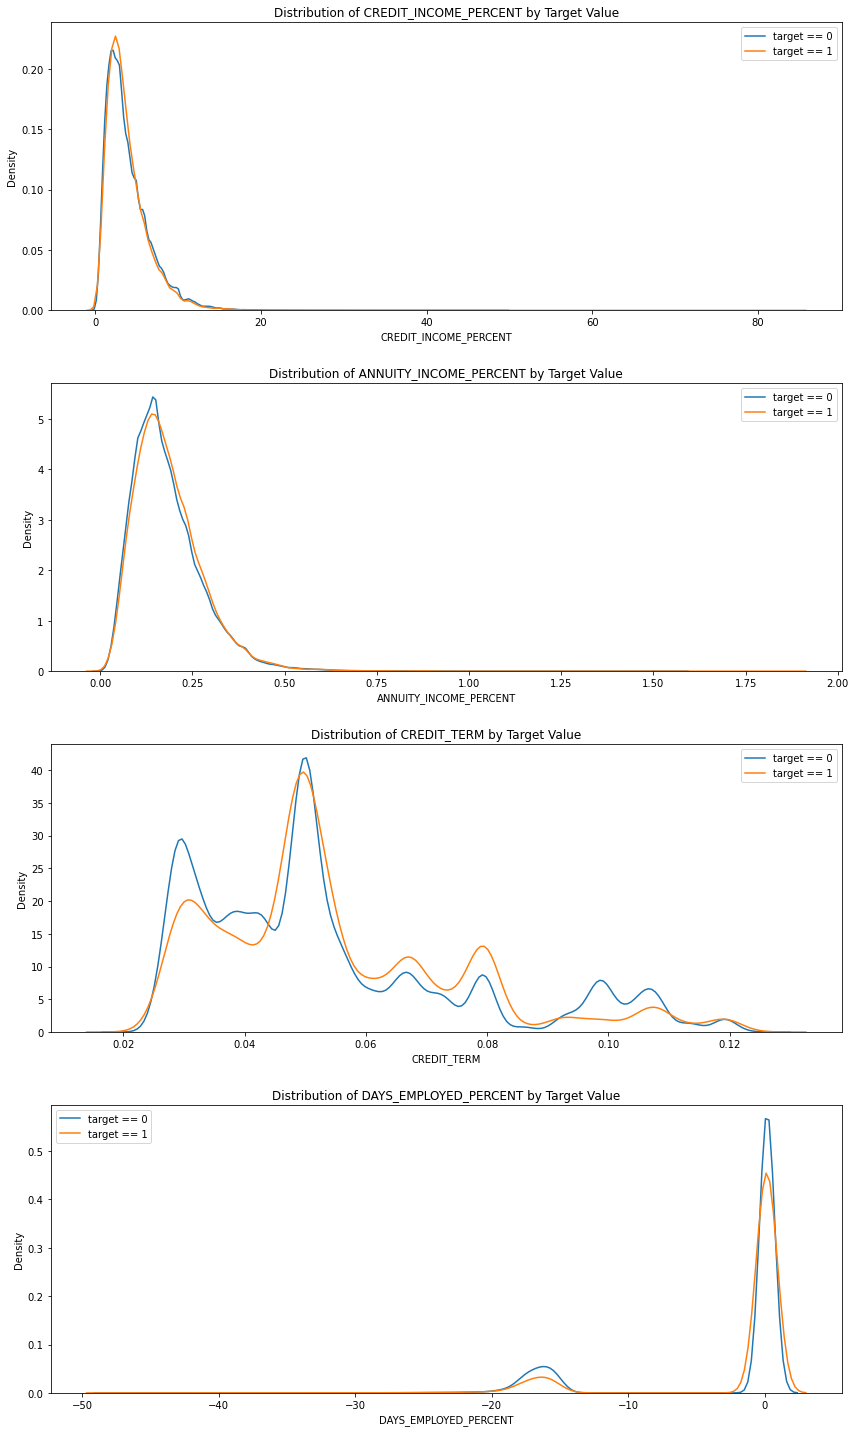

In [110]:
plt.figure(figsize = (12, 20))
# iterate through the new features
for i, feature in enumerate(['CREDIT_INCOME_PERCENT', 'ANNUITY_INCOME_PERCENT', 'CREDIT_TERM', 'DAYS_EMPLOYED_PERCENT']):
    
    # create a new subplot for each source
    plt.subplot(4, 1, i + 1)
    # plot repaid loans
    sns.kdeplot(app_train_domain.loc[app_train_domain['TARGET'] == 0, feature], label = 'target == 0')
    # plot loans that were not repaid
    sns.kdeplot(app_train_domain.loc[app_train_domain['TARGET'] == 1, feature], label = 'target == 1')
    
    # Label the plots
    plt.title('Distribution of %s by Target Value' % feature)
    plt.xlabel('%s' % feature); plt.ylabel('Density')
    plt.legend()
    
plt.tight_layout(h_pad = 2.5)

#  EDA IS END. MOVE TO CLEANING

In [150]:
to_drop_cols

['AMT_GOODS_PRICE',
 'FLAG_EMP_PHONE',
 'REGION_RATING_CLIENT',
 'APARTMENTS_MODE',
 'LIVINGAPARTMENTS_MODE',
 'APARTMENTS_MEDI',
 'LIVINGAPARTMENTS_MEDI',
 'LIVINGAREA_MEDI',
 'BASEMENTAREA_MODE',
 'BASEMENTAREA_MEDI',
 'YEARS_BEGINEXPLUATATION_MODE',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'YEARS_BUILD_MODE',
 'YEARS_BUILD_MEDI',
 'COMMONAREA_MODE',
 'COMMONAREA_MEDI',
 'ELEVATORS_MODE',
 'ELEVATORS_MEDI',
 'ENTRANCES_MODE',
 'ENTRANCES_MEDI',
 'FLOORSMAX_MODE',
 'FLOORSMAX_MEDI',
 'FLOORSMIN_MODE',
 'FLOORSMIN_MEDI',
 'LANDAREA_MODE',
 'LANDAREA_MEDI',
 'APARTMENTS_MODE',
 'LIVINGAPARTMENTS_MODE',
 'APARTMENTS_MEDI',
 'LIVINGAPARTMENTS_MEDI',
 'LIVINGAREA_MODE',
 'LIVINGAREA_MEDI',
 'TOTALAREA_MODE',
 'NONLIVINGAPARTMENTS_MODE',
 'NONLIVINGAPARTMENTS_MEDI',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'NONLIVINGAREA_MEDI',
 'NONLIVINGAREA_MODE']

In [151]:
len(to_drop_cols)

38

In [136]:
flag_doc = []
for i in range(9, 22):
    flag_doc.append("FLAG_DOCUMENT_{}".format(str(i)))
flag_doc

['FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_18',
 'FLAG_DOCUMENT_19',
 'FLAG_DOCUMENT_20',
 'FLAG_DOCUMENT_21']

In [139]:
to_drop_cols_append = ["FLAG_MOBIL", "FLAG_CONT_MOBILE", "REG_REGION_NOT_LIVE_REGION", "FLAG_DOCUMENT_2", "FLAG_DOCUMENT_4", "FLAG_DOCUMENT_5", 
"FLAG_DOCUMENT_7"]

In [152]:
for each in flag_doc:
    to_drop_cols.append(each)
    
for each in to_drop_cols_append:
    to_drop_cols.append(each)
to_drop_cols    

['AMT_GOODS_PRICE',
 'FLAG_EMP_PHONE',
 'REGION_RATING_CLIENT',
 'APARTMENTS_MODE',
 'LIVINGAPARTMENTS_MODE',
 'APARTMENTS_MEDI',
 'LIVINGAPARTMENTS_MEDI',
 'LIVINGAREA_MEDI',
 'BASEMENTAREA_MODE',
 'BASEMENTAREA_MEDI',
 'YEARS_BEGINEXPLUATATION_MODE',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'YEARS_BUILD_MODE',
 'YEARS_BUILD_MEDI',
 'COMMONAREA_MODE',
 'COMMONAREA_MEDI',
 'ELEVATORS_MODE',
 'ELEVATORS_MEDI',
 'ENTRANCES_MODE',
 'ENTRANCES_MEDI',
 'FLOORSMAX_MODE',
 'FLOORSMAX_MEDI',
 'FLOORSMIN_MODE',
 'FLOORSMIN_MEDI',
 'LANDAREA_MODE',
 'LANDAREA_MEDI',
 'APARTMENTS_MODE',
 'LIVINGAPARTMENTS_MODE',
 'APARTMENTS_MEDI',
 'LIVINGAPARTMENTS_MEDI',
 'LIVINGAREA_MODE',
 'LIVINGAREA_MEDI',
 'TOTALAREA_MODE',
 'NONLIVINGAPARTMENTS_MODE',
 'NONLIVINGAPARTMENTS_MEDI',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'NONLIVINGAREA_MEDI',
 'NONLIVINGAREA_MODE',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMEN

In [153]:
len(to_drop_cols)

58

In [154]:
application_train.drop(columns = to_drop_cols).head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

  NAME_TYPE_SUITE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0   Unaccompanied          Working  Secondary / secondary special   
1          Family    State servant               Higher education   
2   Unaccompanied          Working  Secondary / secondary special   
3   Unaccompanied          Working  Secondary / secondary special   
4   Unaccompanied          Working  Secondary / secondary special   

     NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  \
0  Single / not married  House / apartment                    0.018801   
1               Married  House / apartment                    0.003541   
2  Single / not married  House / apartment                    0.010032   
3        Civil marriage  House / apartment                    0.008019   
4  Single / not married  House / apartment                    0.028663   

   DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  \
0       -9461           -637            -3648.0            -2120          NaN   
1      -16765          -1188            -1186.0             -291          NaN   
2      -19046           -225            -4260.0            -2531         26.0   
3      -19005          -3039            -9833.0            -2437          NaN   
4      -19932          -3038            -4311.0            -3458          NaN   

   FLAG_WORK_PHONE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                0           1           0        Laborers              1.0   
1                0           1           0      Core staff              2.0   
2                1           1           0        Laborers              1.0   
3                0           0           0        Laborers              2.0   
4                0           0           0      Core staff              1.0   

   REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
0                            2                  WEDNESDAY   
1                            1                     MONDAY   
2                            2                     MONDAY   
3                            2                  WEDNESDAY   
4                            2                   THURSDAY   

   HOUR_APPR_PROCESS_START  REG_REGION_NOT_WORK_REGION  \
0                       10                           0   
1                       11                           0   
2                        9                           0   
3                       17                           0   
4                       11                           0   

   LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  \
0                            0                       0   
1                            0                       0   
2                            0                       0   
3                            0                       0   
4                            0                       0   

   REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  \
0                       0                        0  Business Entity Type 3   
1                       0                        0                  School  

In [156]:
application_train.drop(columns = to_drop_cols).shape

(307511, 69)